In [1]:
# MNIST - https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/
data_dir = '/Users/rytis/Desktop/EU_parama/data/GTSRB/'

In [2]:
import cv2
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
# isolation forest for abnormality in histogram
from sklearn.ensemble import IsolationForest

In [3]:
def read_dataset(csv_path, images_dir):
    data_dict = {}
    regions_df = pd.read_csv(csv_path)
    # Iterate through each row in the CSV file
    for index, row in regions_df.iterrows():
        img_path = f"{images_dir}/{row['Path']}"
        x, y, w, h = int(row['Roi.X1']), int(row['Roi.Y1']), int(row['Width']), int(row['Height'])
        class_label = int(row['ClassId'])

        # Load the image
        image = cv2.imread(img_path)

        # Extract the specified region
        region = image[y:y+h, x:x+w]

        # Create a class-specific list if it doesn't exist
        if class_label not in data_dict:
            data_dict[class_label] = []

        # Append the extracted region to the corresponding class list
        data_dict[class_label].append(region)
    data_dict = {k: data_dict[k] for k in sorted(data_dict)}
    return data_dict

In [4]:
# load data
# Path to the GTSRB dataset and CSV file
train_csv_file = data_dir + 'Train.csv'
train_dict = read_dataset(train_csv_file, data_dir)
print(f'Training classes {len(train_dict)}')

test_csv_file = data_dir + 'Test.csv'
test_dict = read_dataset(test_csv_file, data_dir)
print(f'Testing classes {len(train_dict)}')

Training classes 43
Testing classes 43


In [5]:
def plot_data_distribution(data_dict, plot_name):
    # Count the number of samples in each class
    class_counts = {class_label: len(regions) for class_label, regions in data_dict.items()}

    # Extract class labels and corresponding counts
    class_labels = list(class_counts.keys())
    class_sample_counts = list(class_counts.values())

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(class_labels, class_sample_counts)
    plt.xlabel('Class Label')
    plt.ylabel('Number of Samples')
    plt.title(f'{plot_name} Number of Samples in Each Class')
    bars = plt.bar(class_labels, class_sample_counts)
    # Add vertical counts on the bars
    for bar, count in zip(bars, class_sample_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, 30, count, ha='center', va='bottom', rotation='vertical')
    plt.xticks(class_labels)
    # Add grid lines in x and y directions
    plt.grid(True, axis='both', linestyle='--', alpha=0.6)
    
    plt.show()

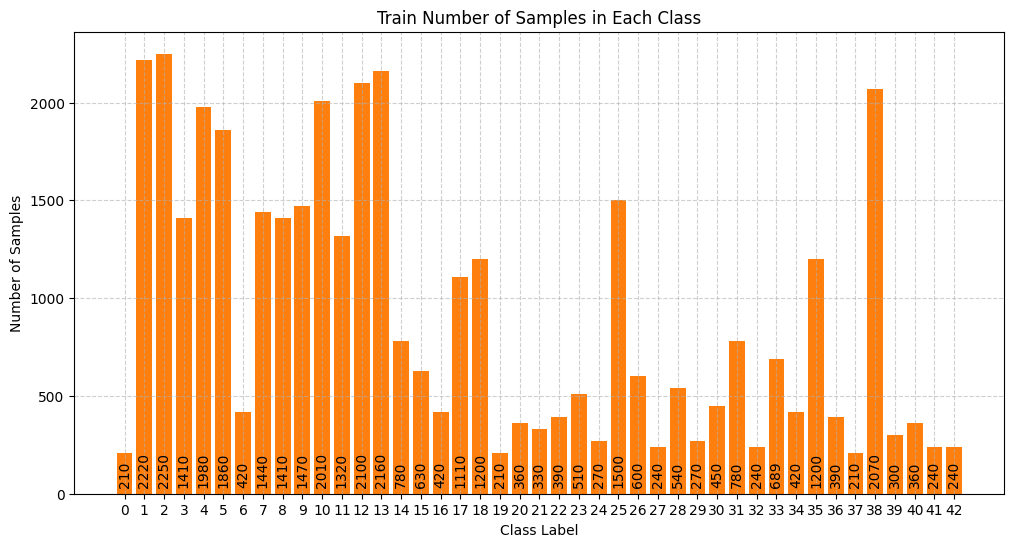

In [6]:
plot_data_distribution(train_dict, 'Train')

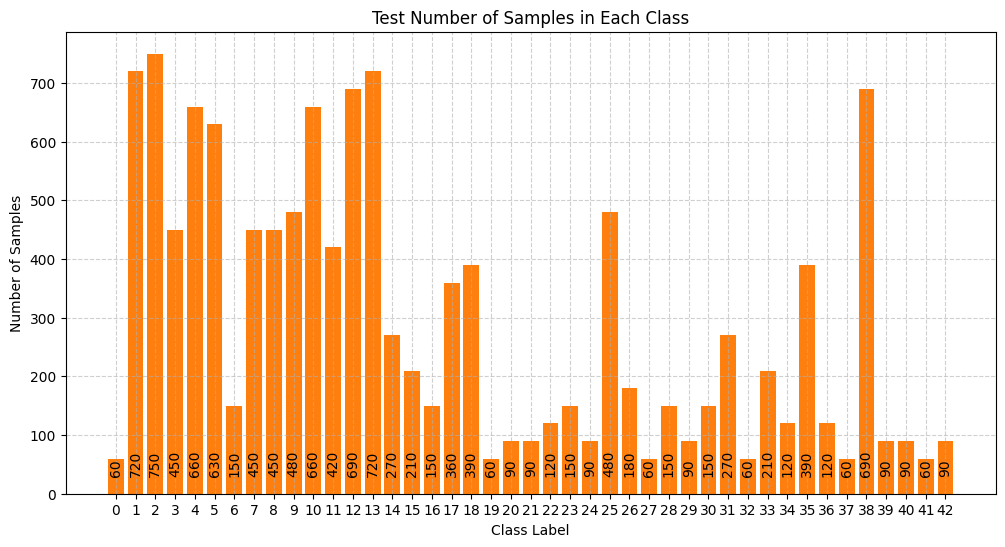

In [7]:
plot_data_distribution(test_dict, 'Test')

In [8]:
# show few sample of each dataset
# Display a few sample images from each class
def preview_dataset(class_regions):
    num_samples_to_display = 3 
    for class_label, regions in class_regions.items():
        plt.figure(figsize=(12, 4))
        plt.suptitle(f'Sample Images for Class {class_label}')
        for i in range(num_samples_to_display):
            plt.subplot(1, num_samples_to_display, i + 1)
            random_region = random.choice(regions)
            plt.imshow(cv2.cvtColor(random_region, cv2.COLOR_BGR2RGB))
            #plt.axis('off')
        plt.tight_layout()  # Add tight layout for subplots
    plt.show()

/var/folders/lg/9zhrbtxs2wb2227l39_4zqx00000gn/T/ipykernel_4896/1671653096.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))


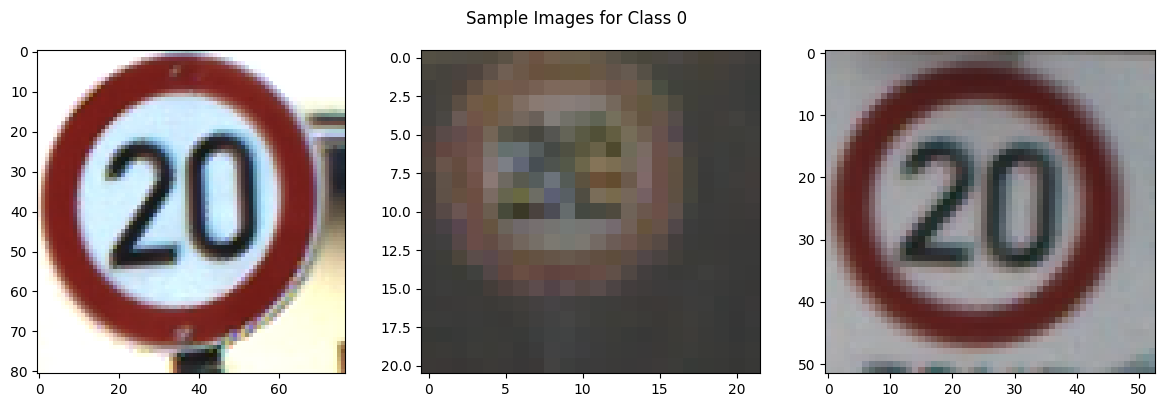

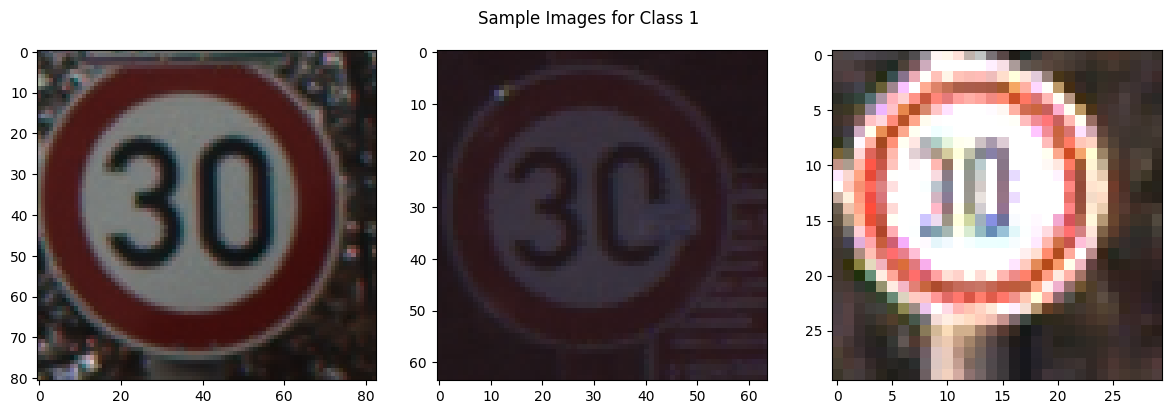

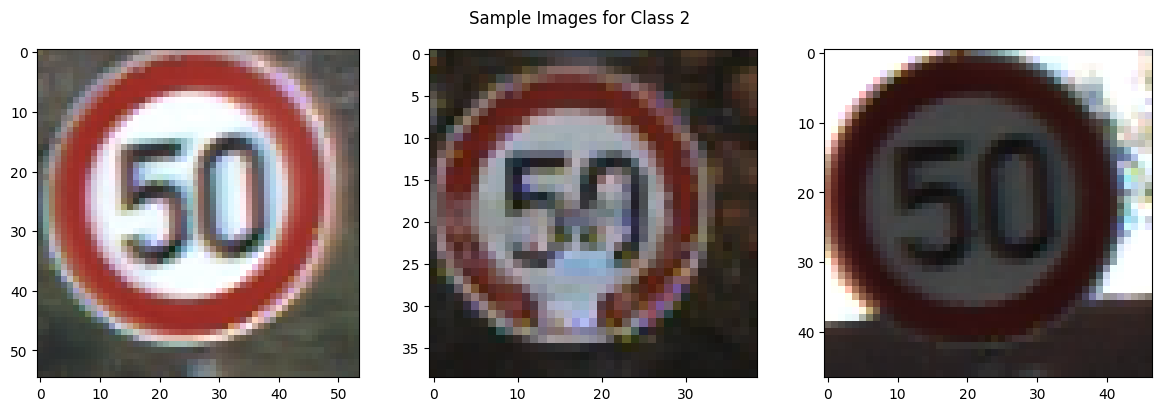

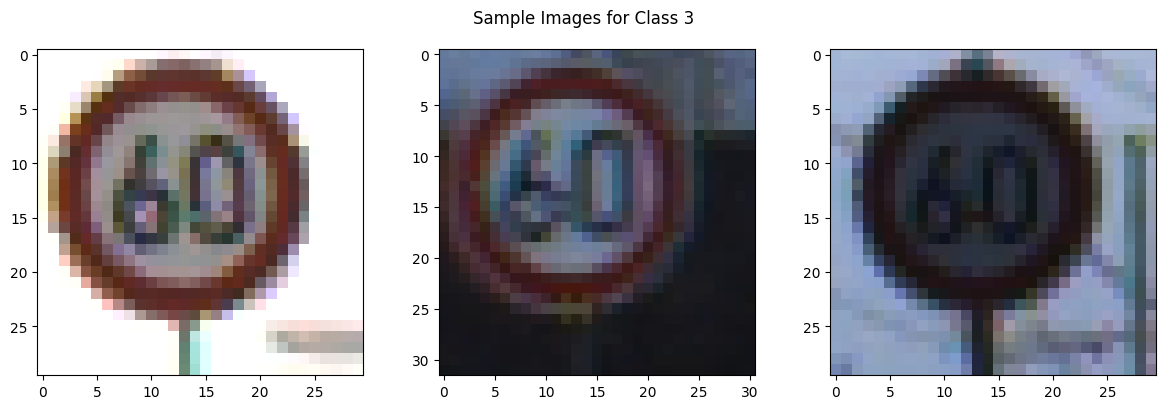

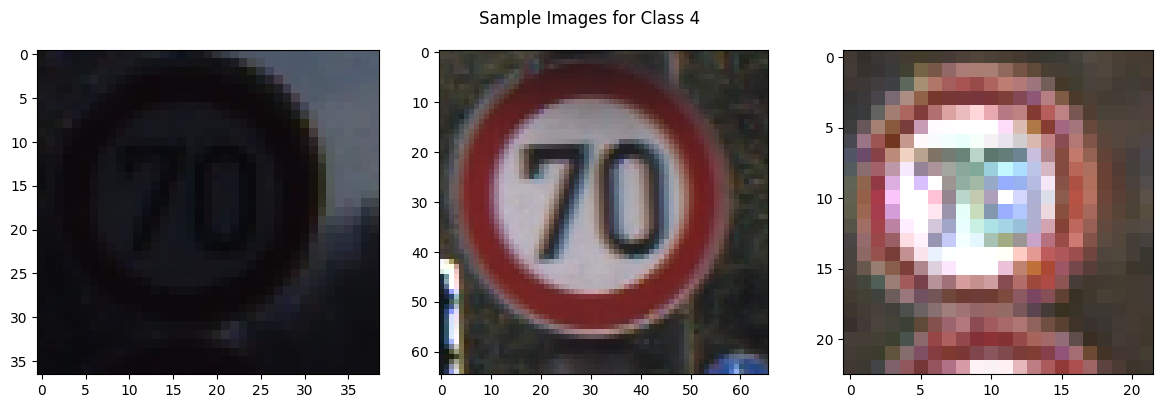

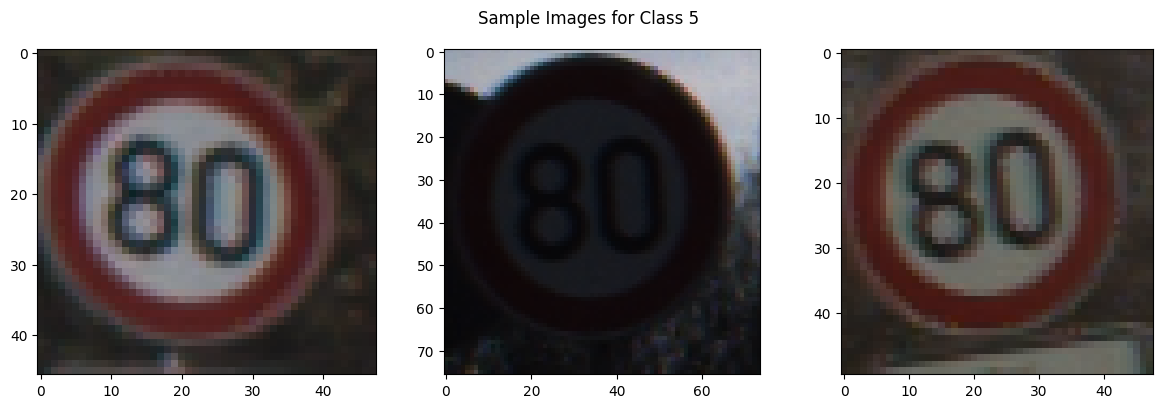

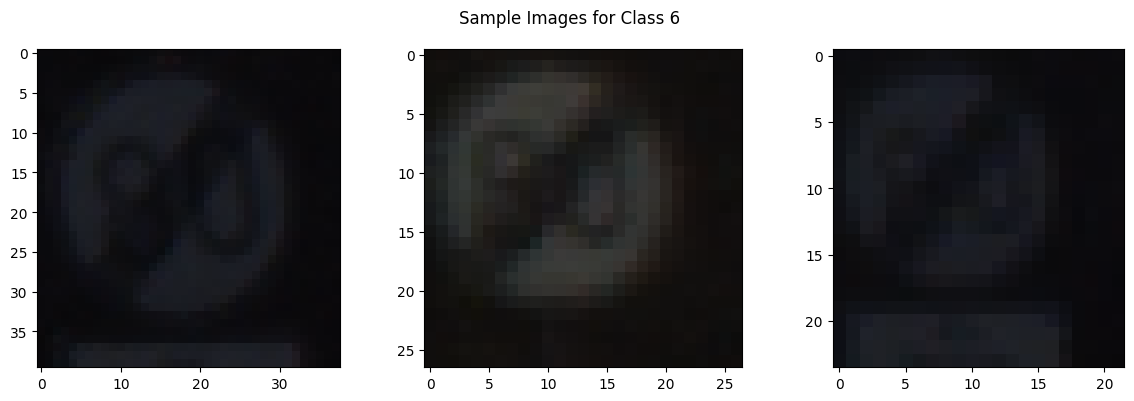

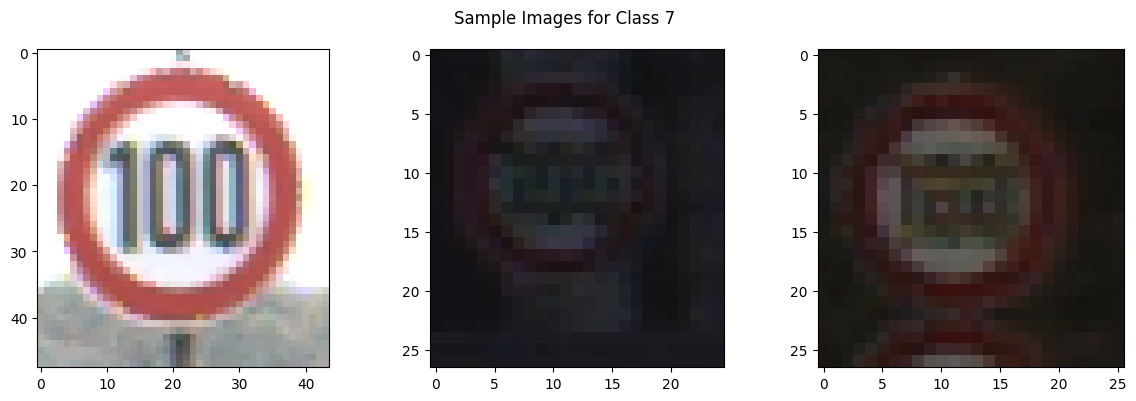

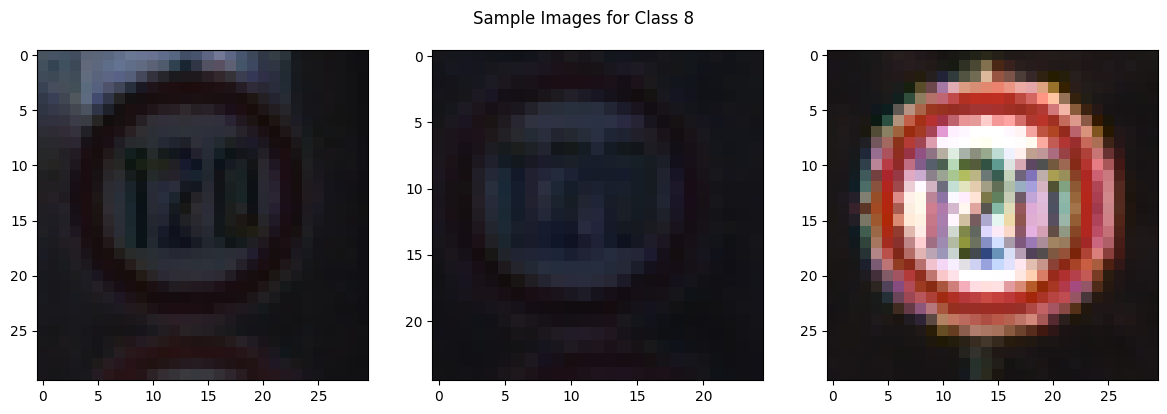

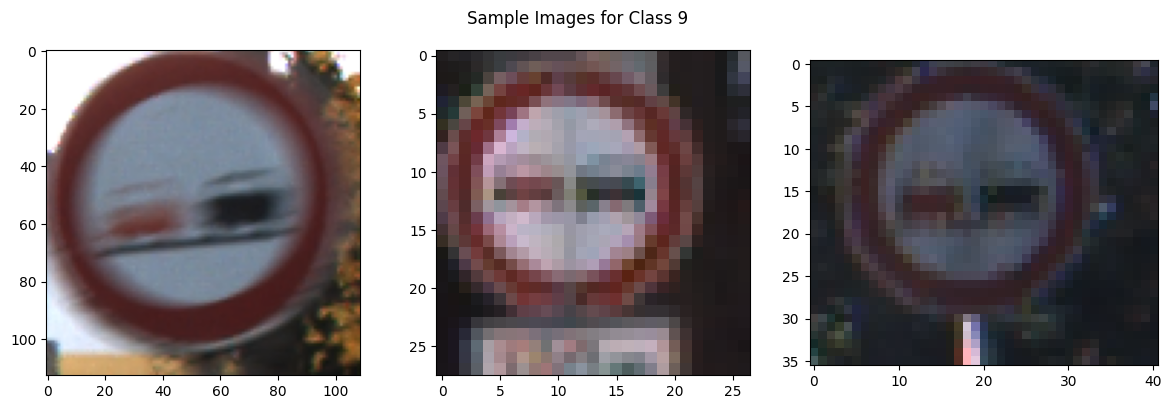

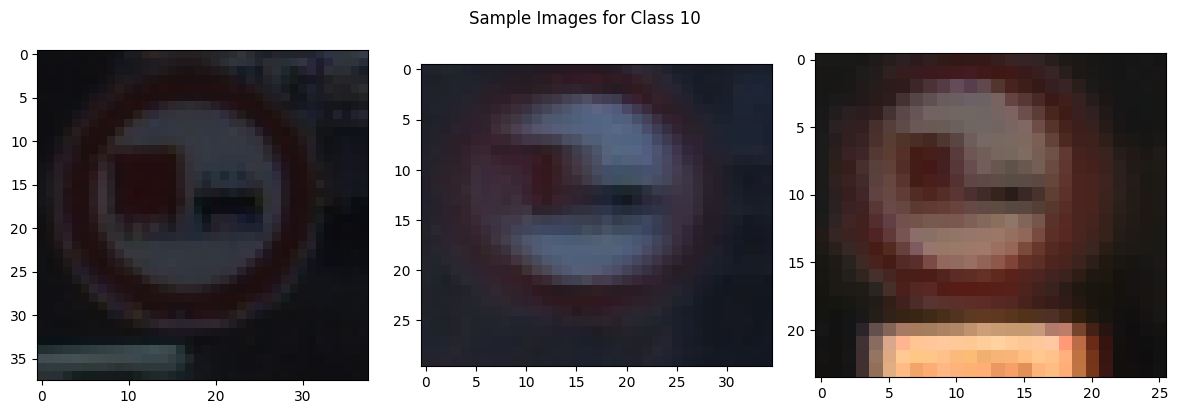

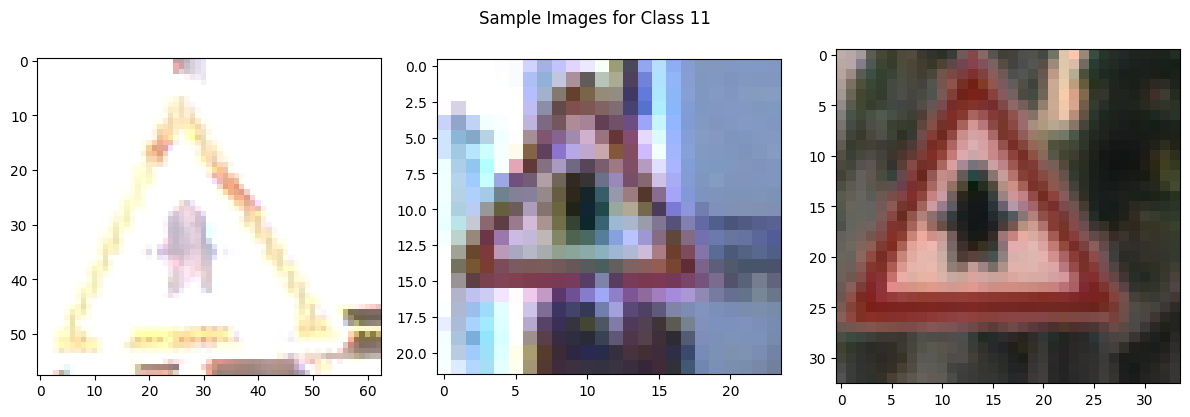

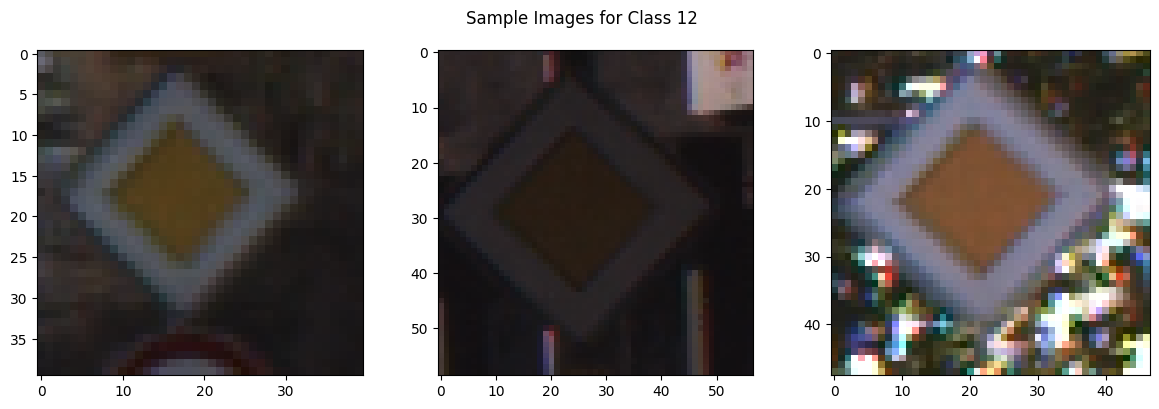

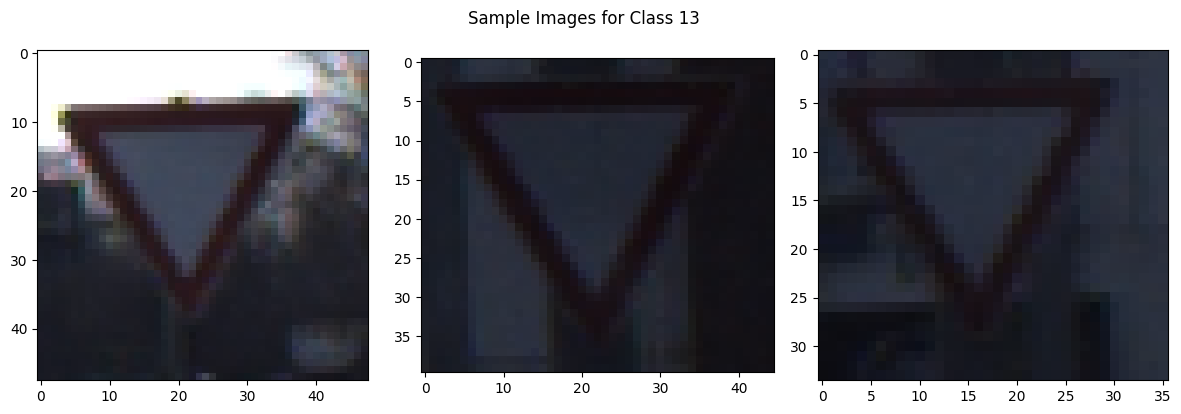

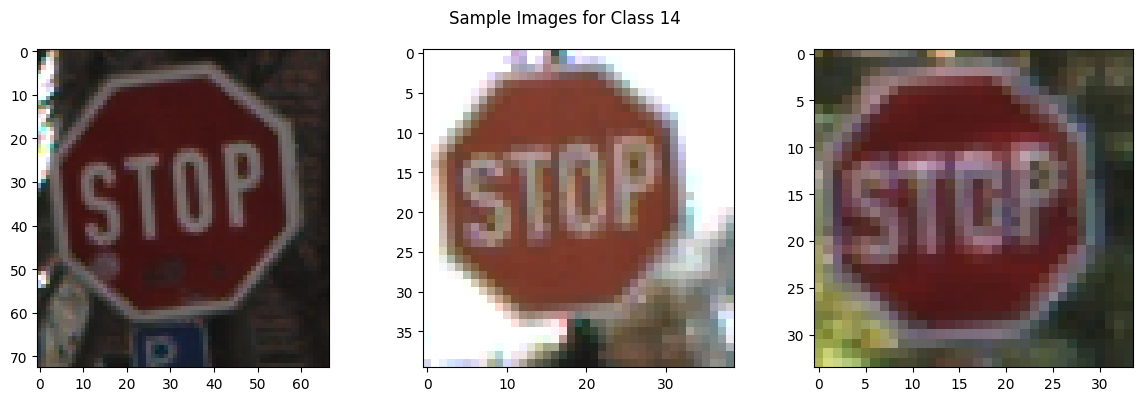

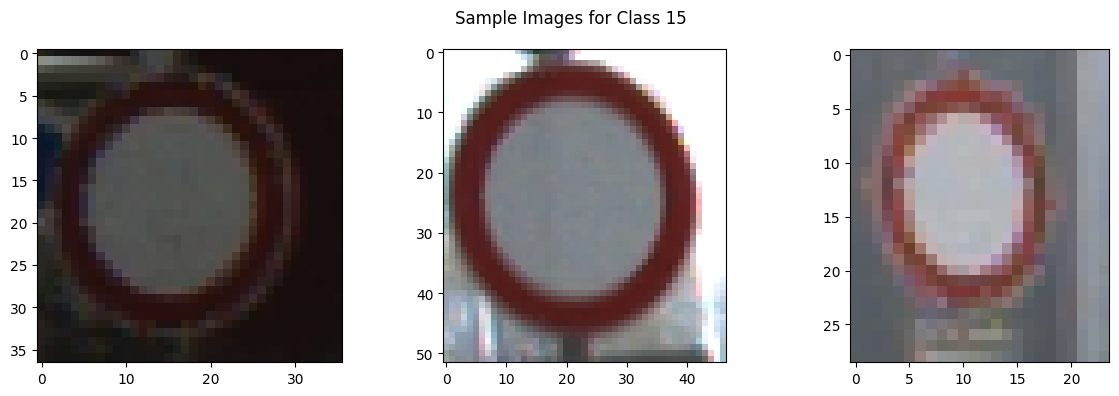

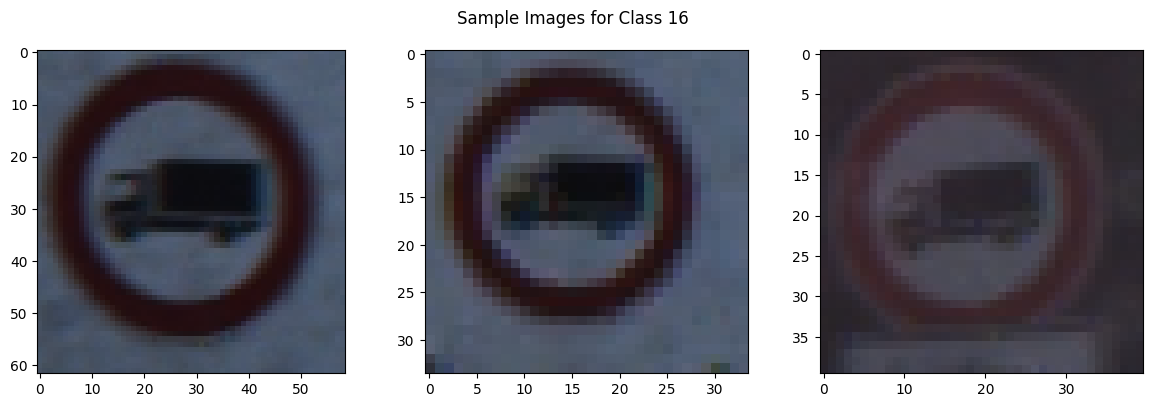

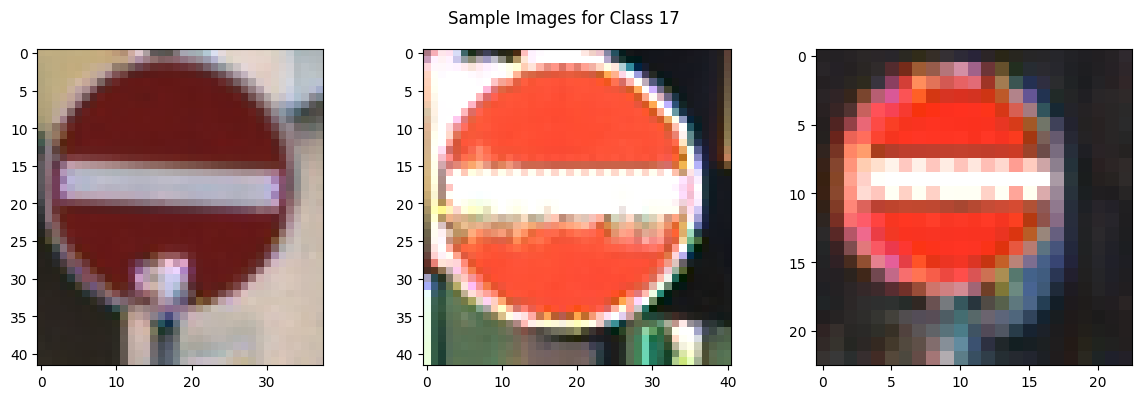

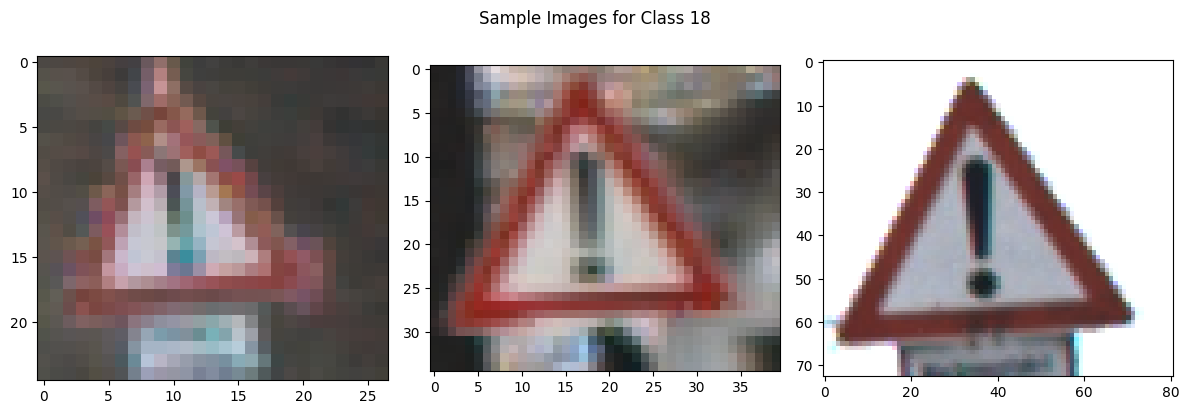

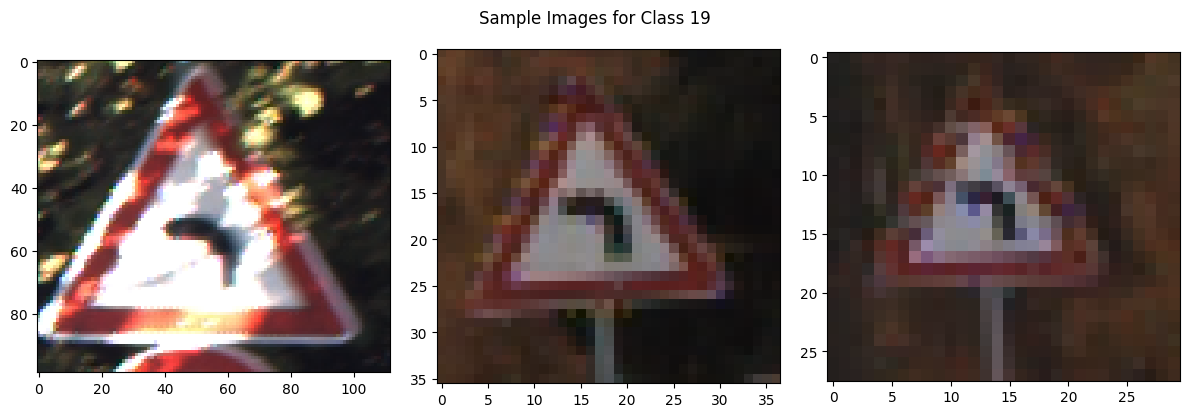

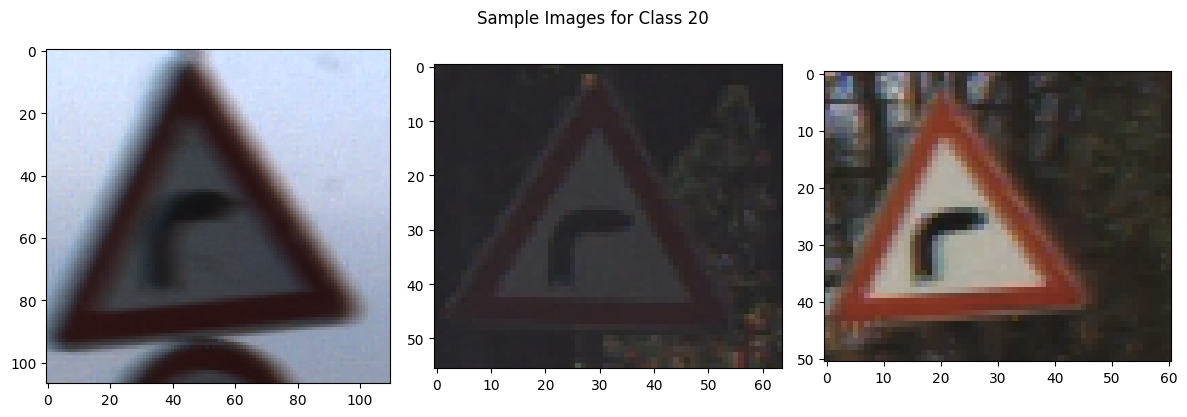

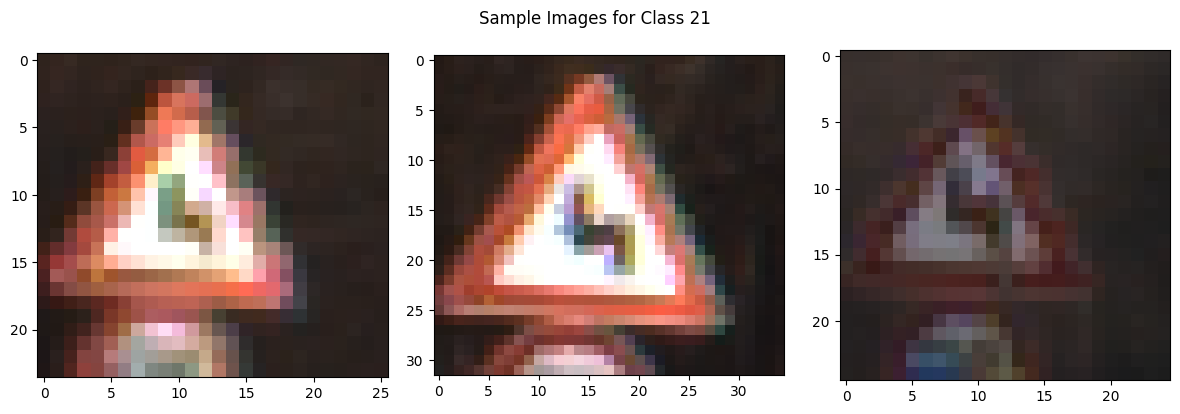

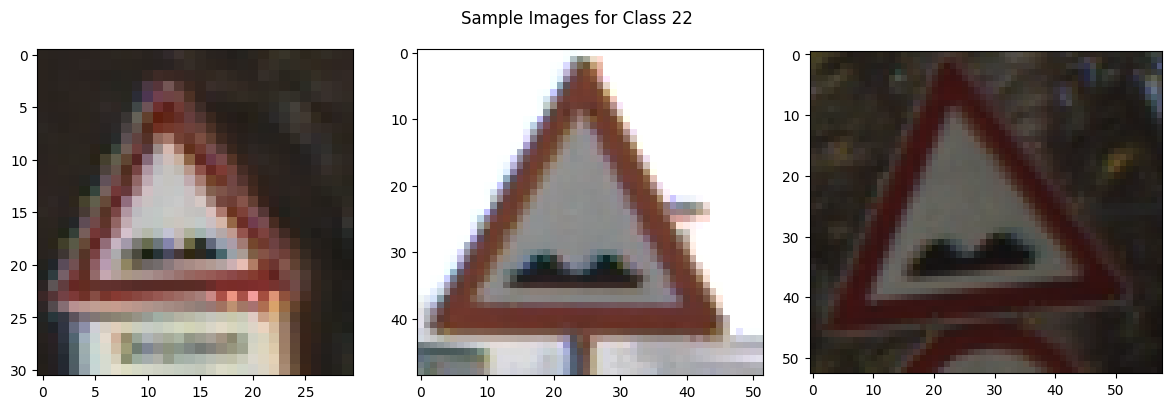

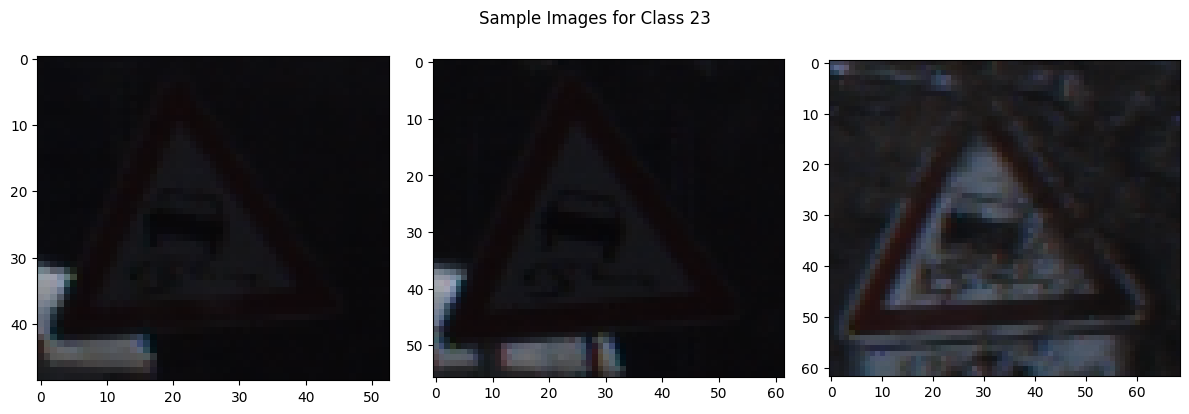

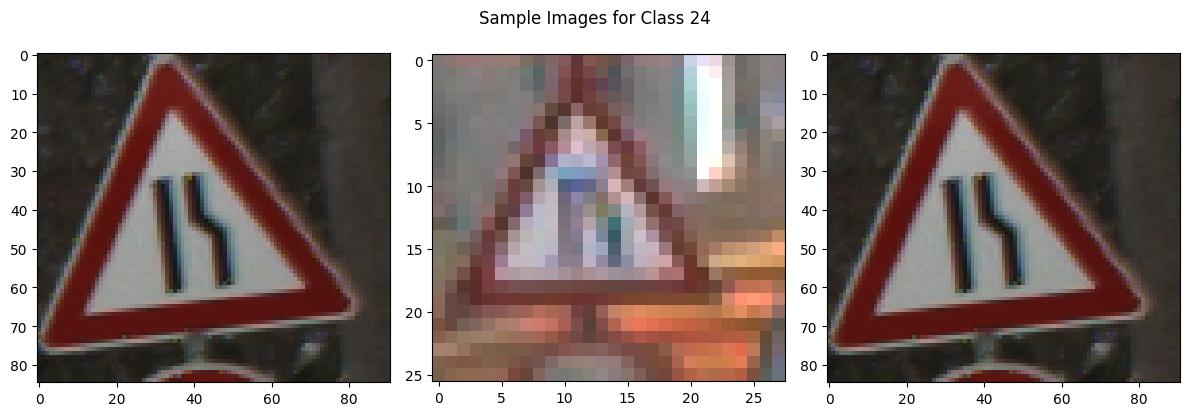

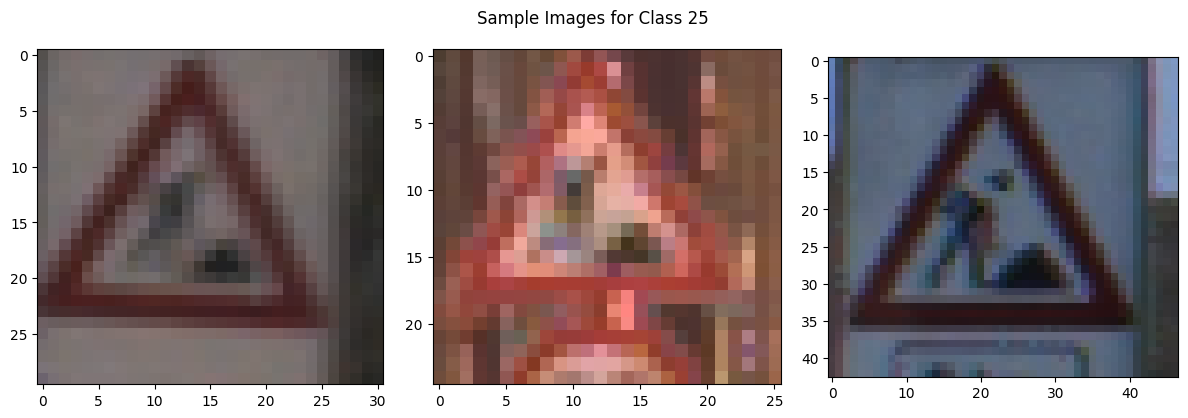

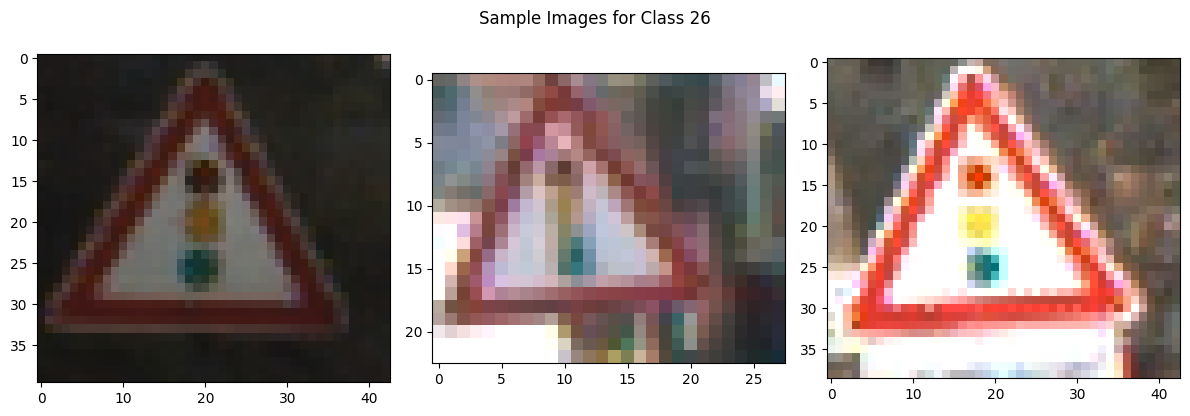

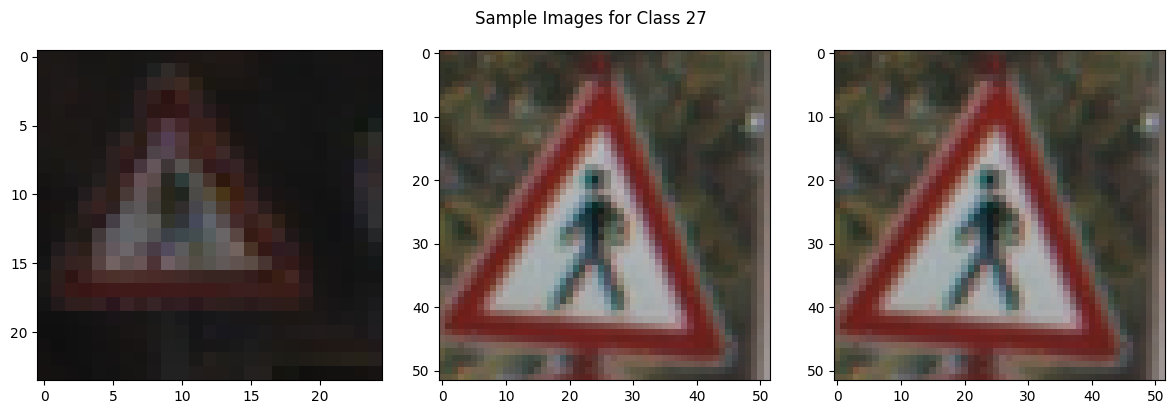

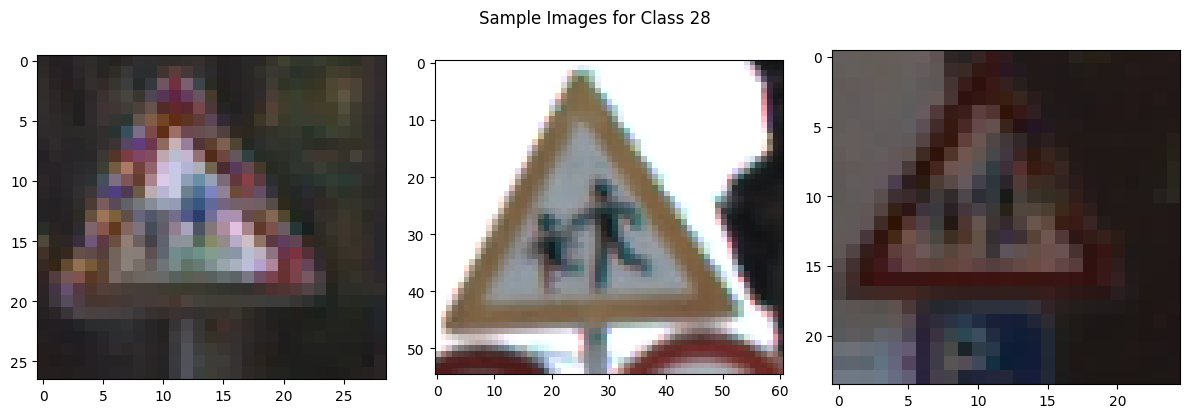

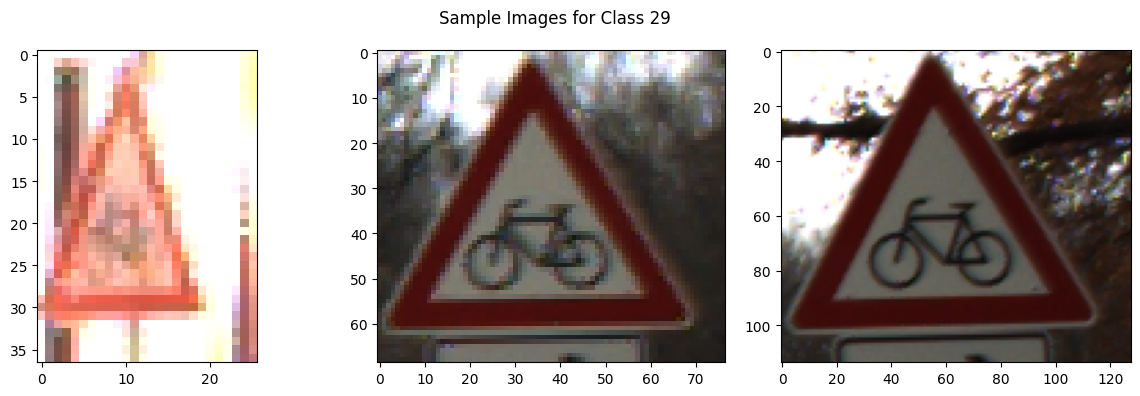

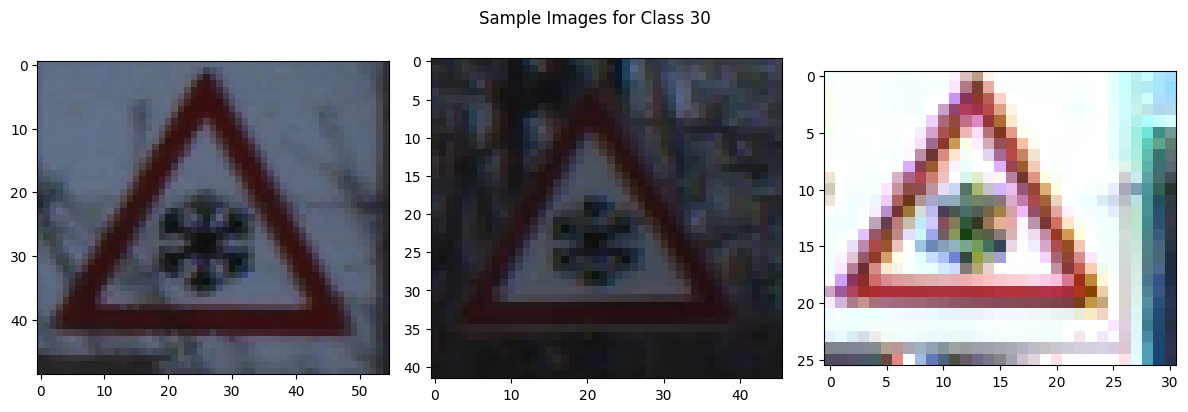

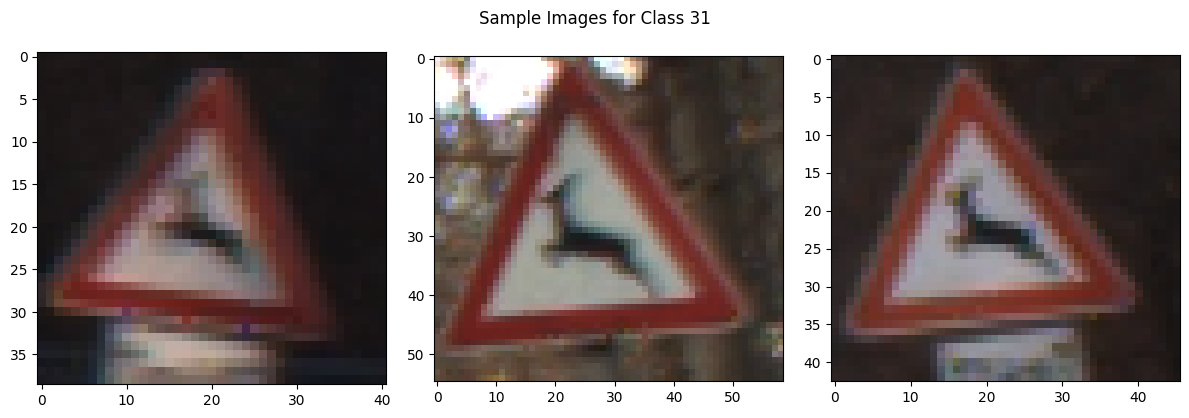

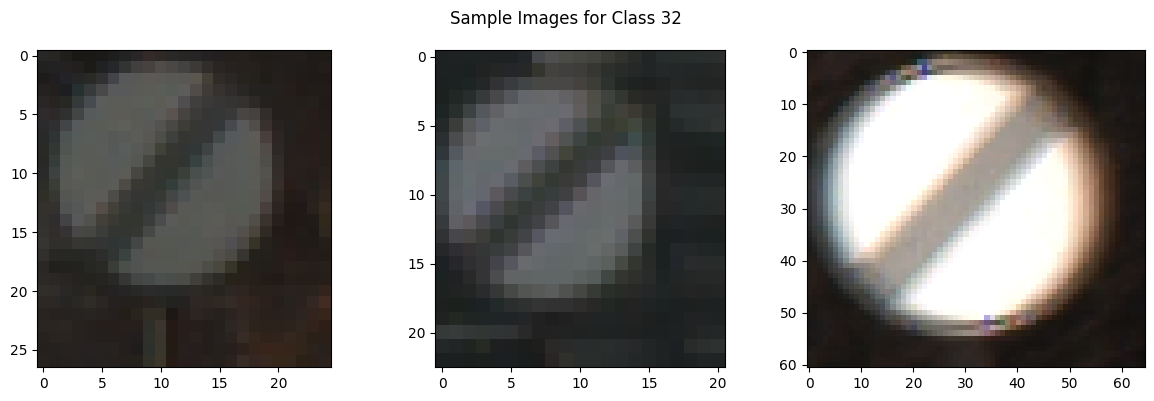

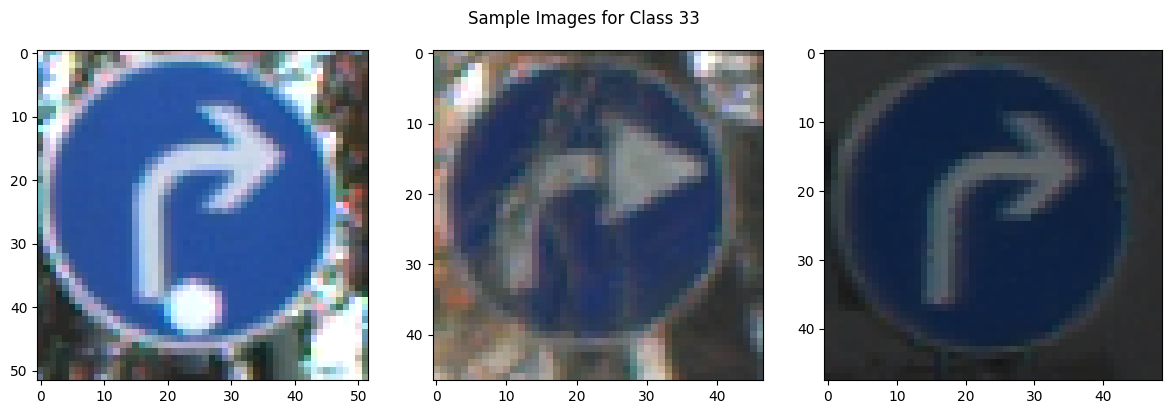

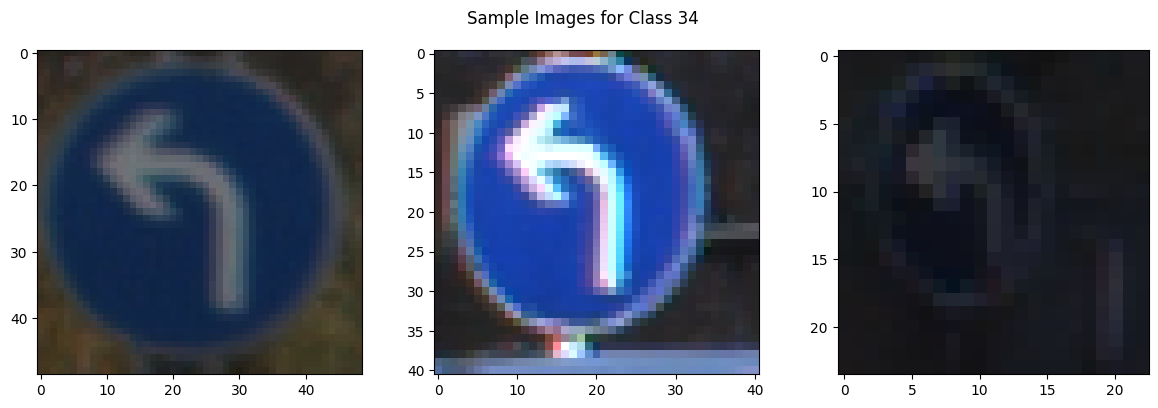

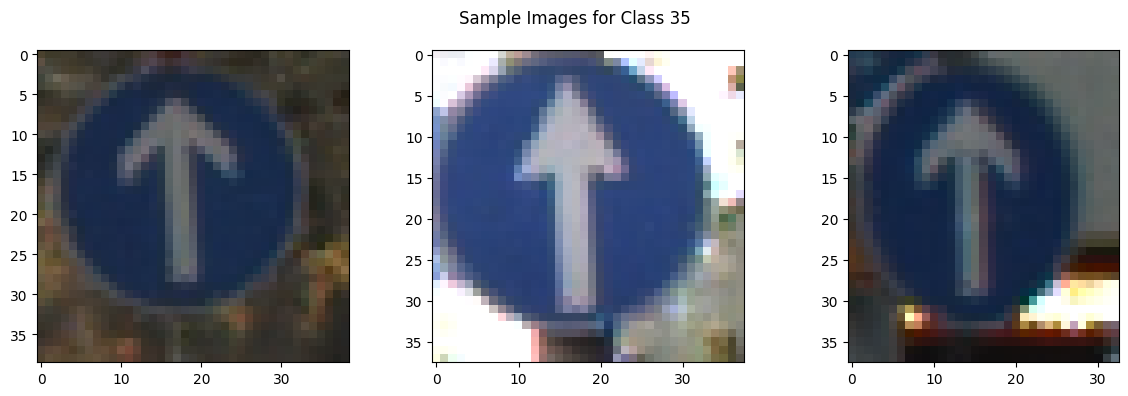

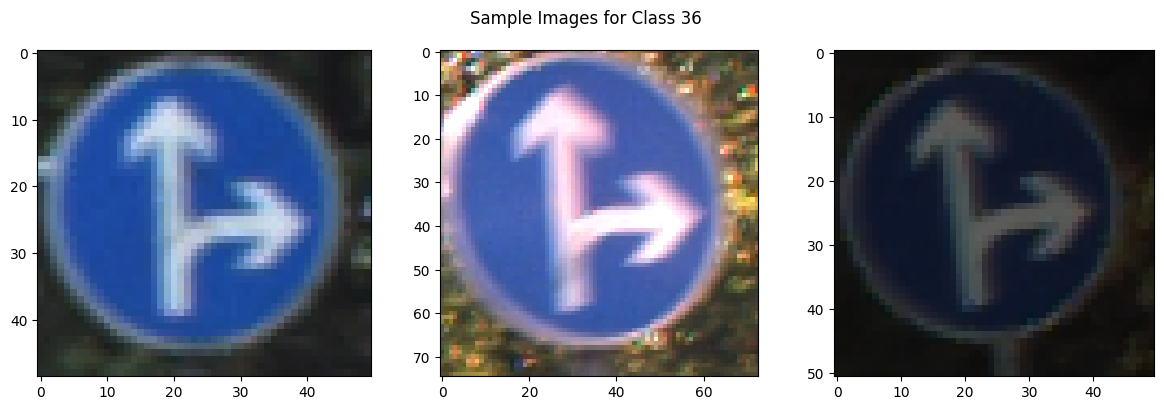

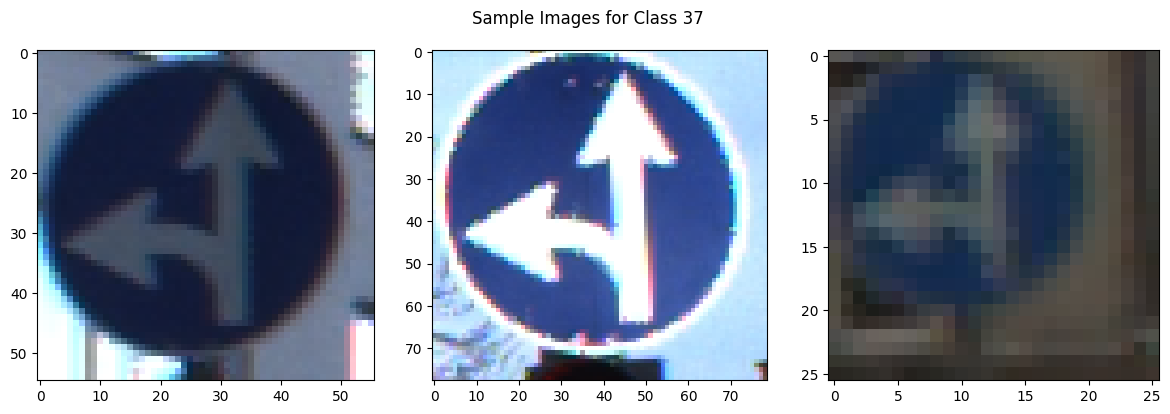

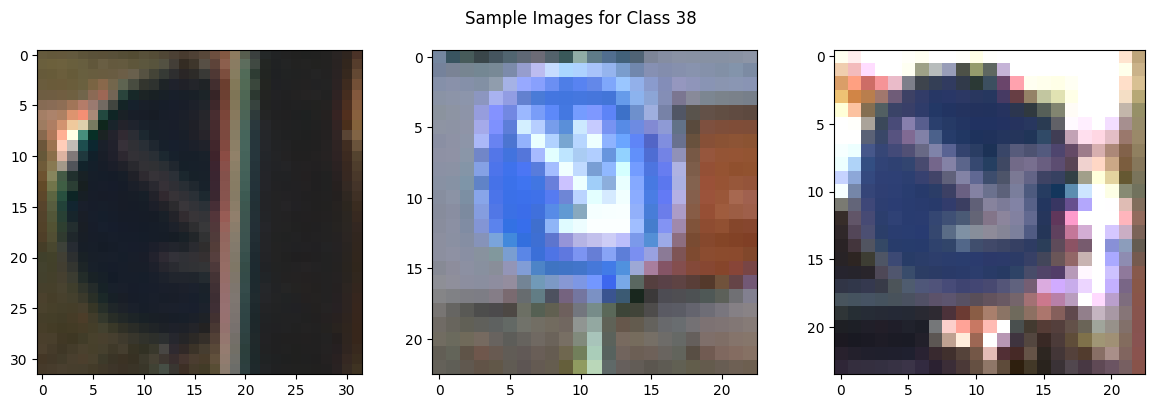

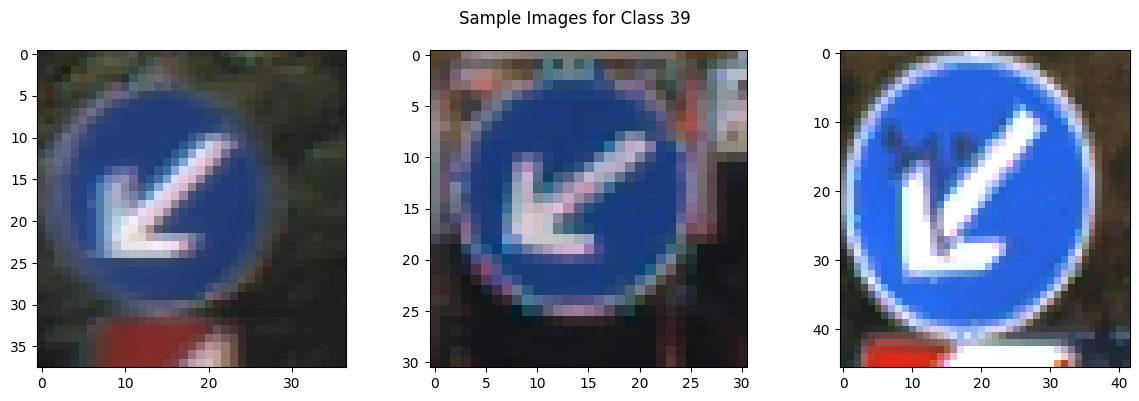

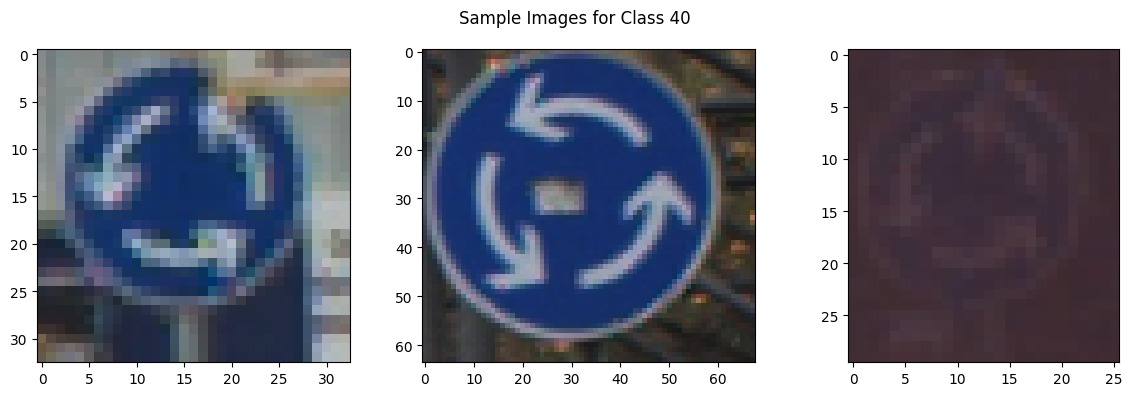

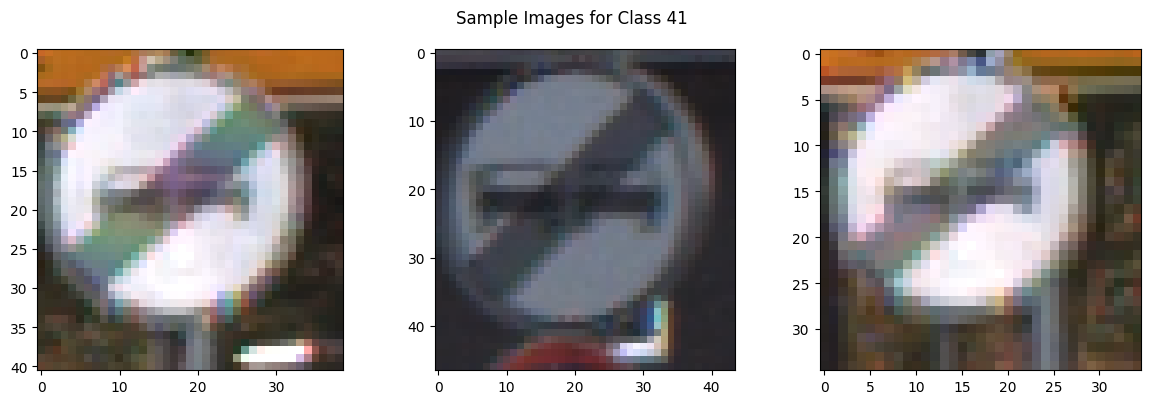

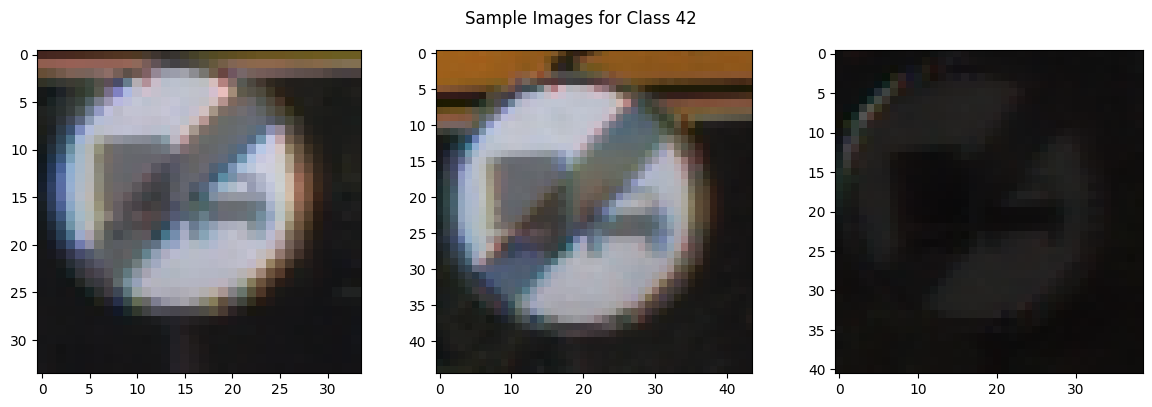

In [9]:
preview_dataset(train_dict)

In [10]:
def get_histograms(class_regions):
    # Create a dictionary to store histograms for each class
    class_histograms = {}

    # Iterate through each class
    for class_label, regions in class_regions.items():
        # Initialize an empty list to store histograms for this class
        histograms_per_channel = []

        for region in regions:
            # Calculate and store the histogram
            pixel_count = region.size  # Calculate pixel count
            histogram = np.array([cv2.calcHist([region], [channel], None, [256], [0, 256])
                                  for channel in range(3)]) / pixel_count # Separate histograms for Red, Green, and Blue
            histograms_per_channel.append(histogram)  # Divide histogram values by pixel count
        # Compute the average histogram for the class
        average_histogram = np.mean(np.array(histograms_per_channel), axis=0)
        # Store the average histogram
        class_histograms[class_label] = average_histogram
        
    return class_histograms

In [11]:
train_classes_histograms = get_histograms(train_dict)

In [12]:
def plot_channel_histograms_for_class(class_label, histograms):
    plt.figure(figsize=(8, 6))
    plt.title(f'RGB Histogram for Class {class_label}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.plot(histograms[2, :], color='red', label='Red Channel')
    plt.plot(histograms[1, :], color='green', label='Green Channel')
    plt.plot(histograms[0, :], color='blue', label='Blue Channel')

    plt.legend()
    plt.grid()
    plt.show()

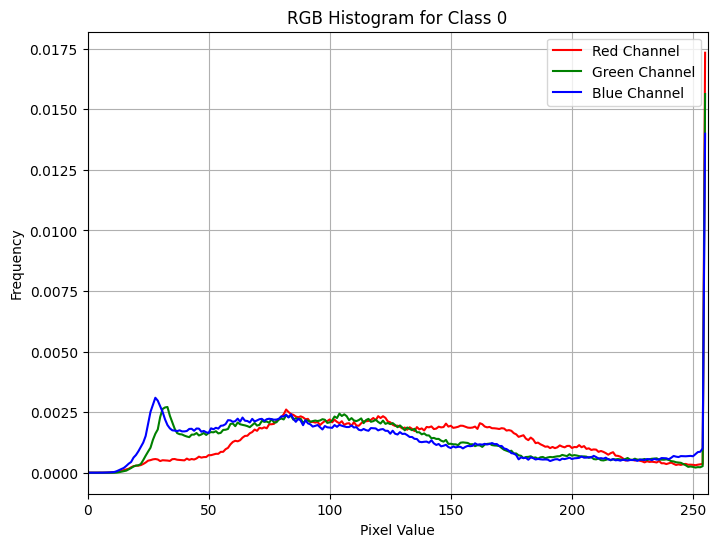

(3, 256, 1)


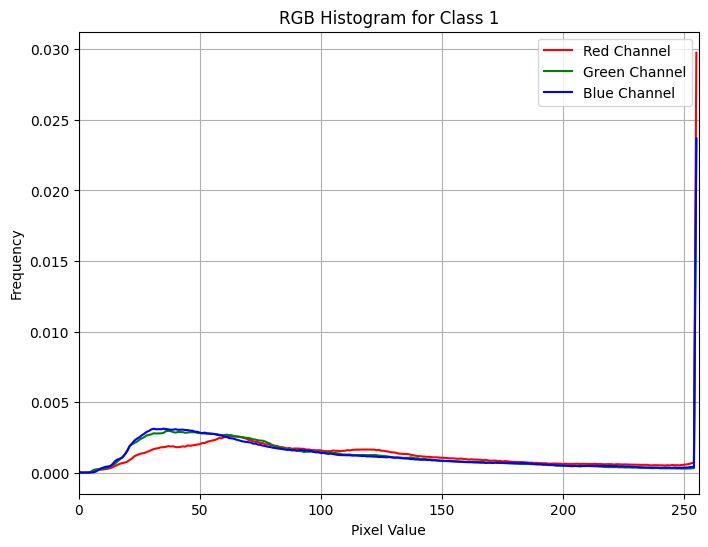

(3, 256, 1)


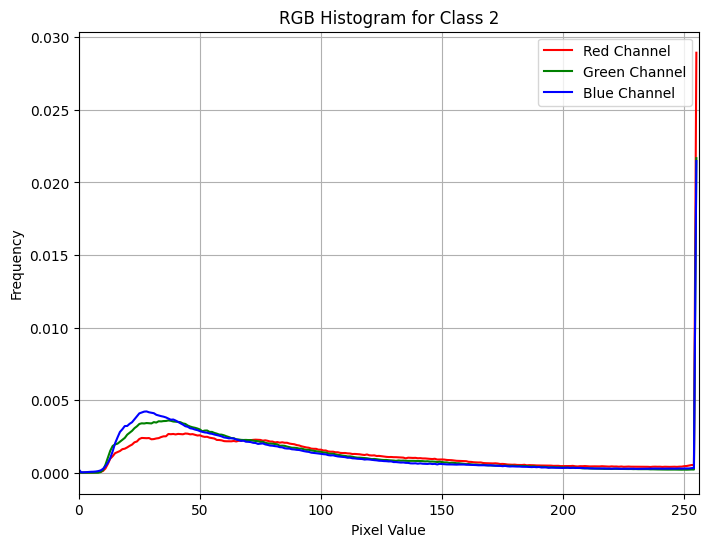

(3, 256, 1)


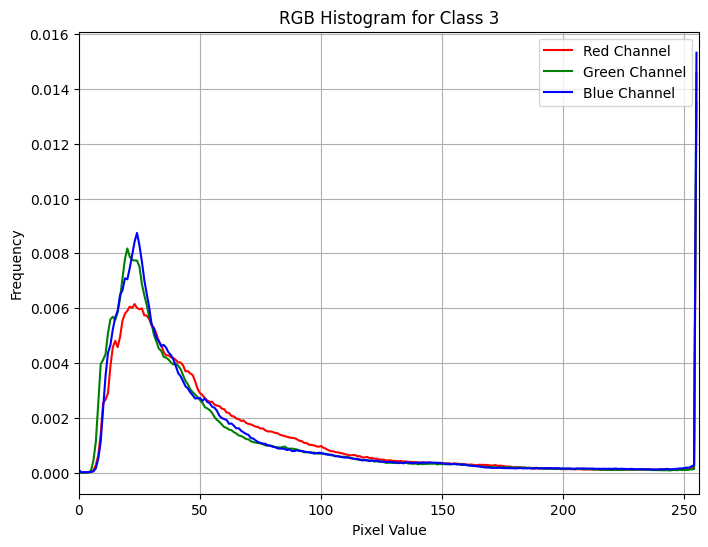

(3, 256, 1)


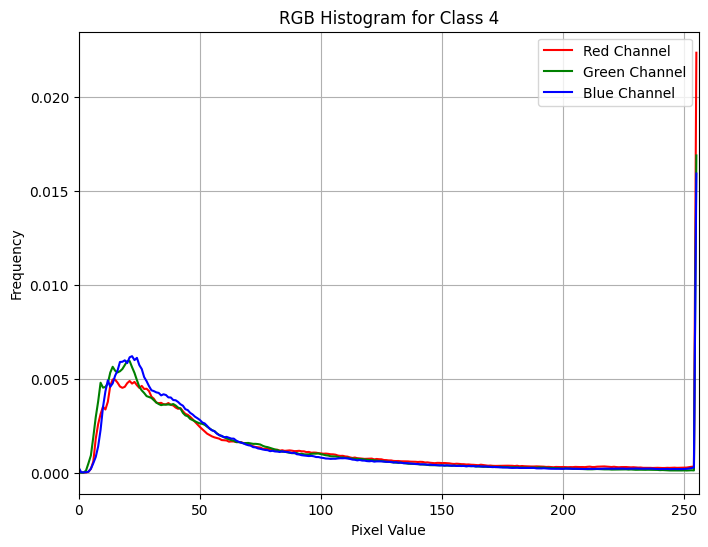

(3, 256, 1)


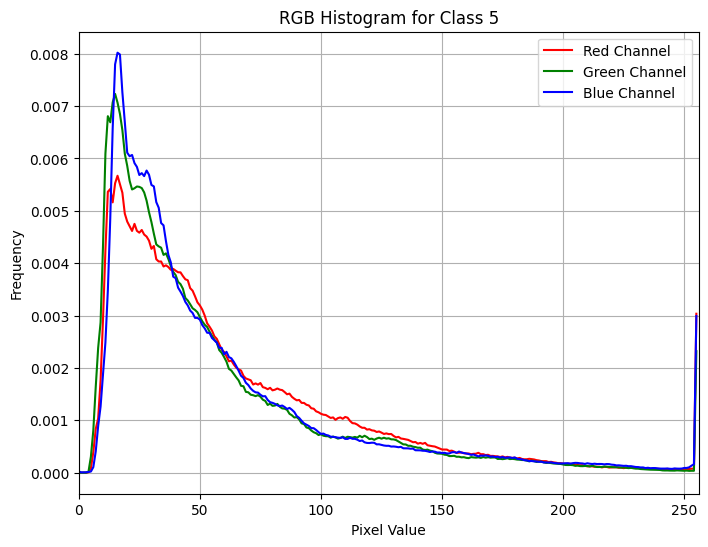

(3, 256, 1)


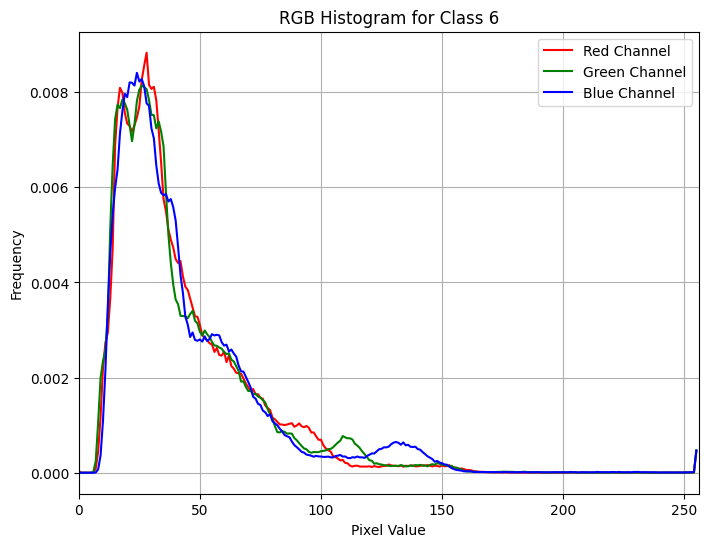

(3, 256, 1)


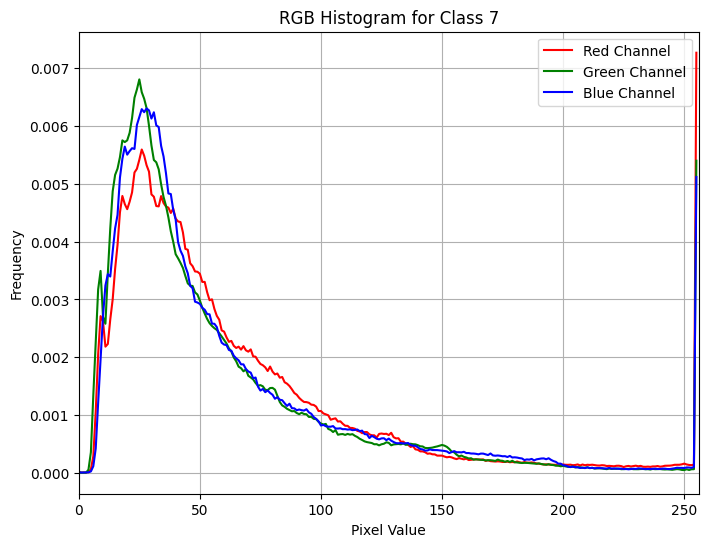

(3, 256, 1)


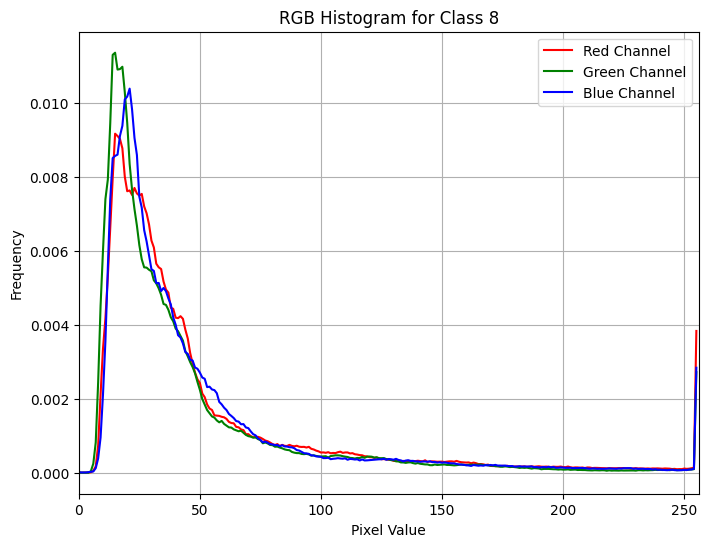

(3, 256, 1)


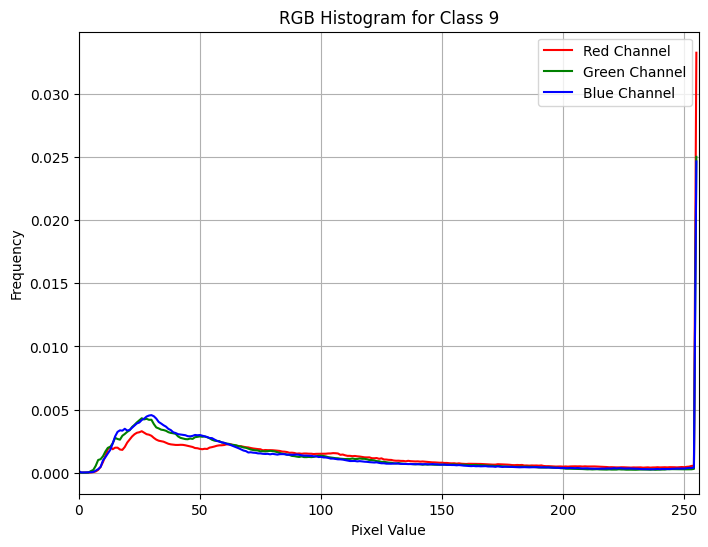

(3, 256, 1)


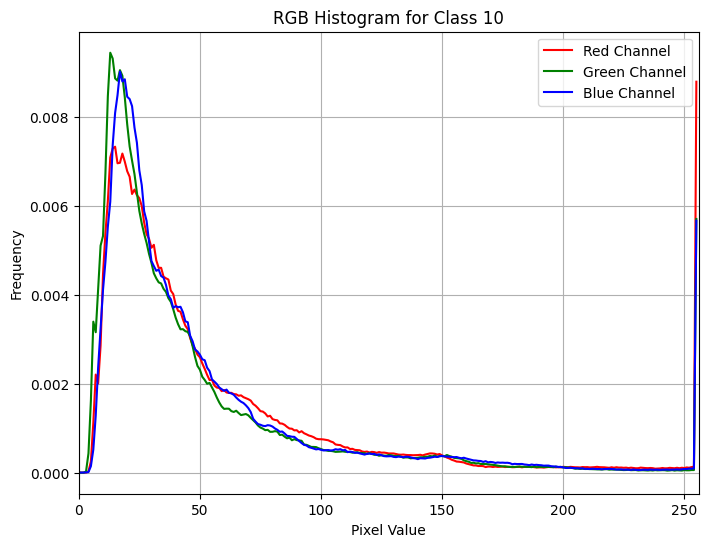

(3, 256, 1)


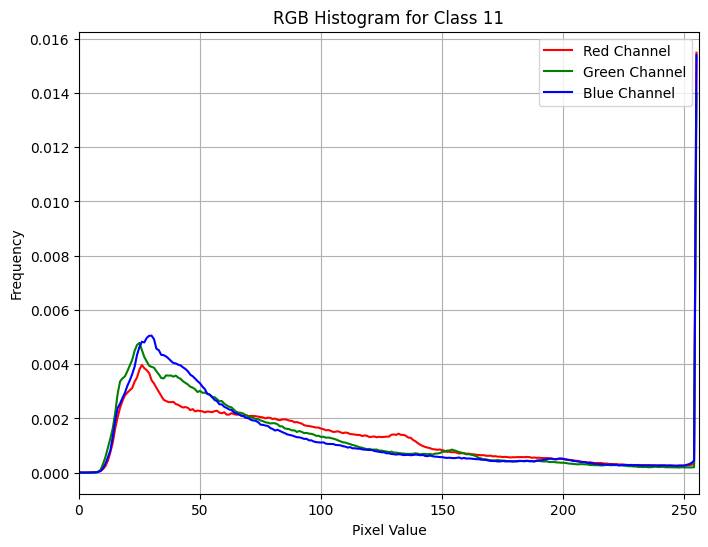

(3, 256, 1)


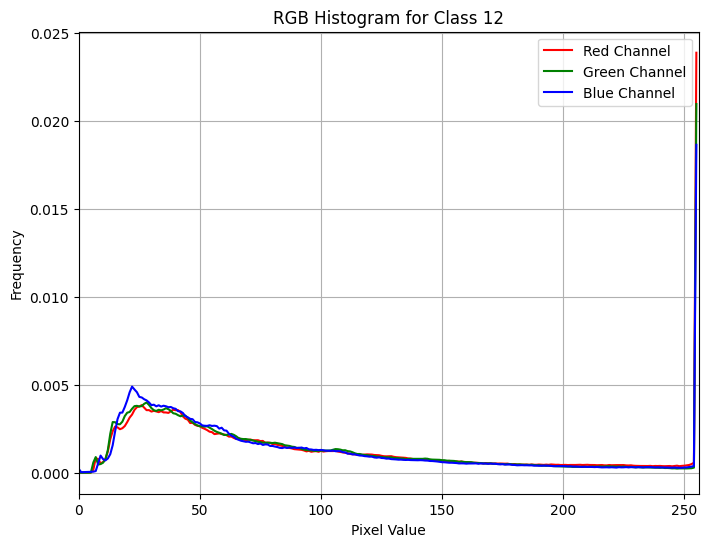

(3, 256, 1)


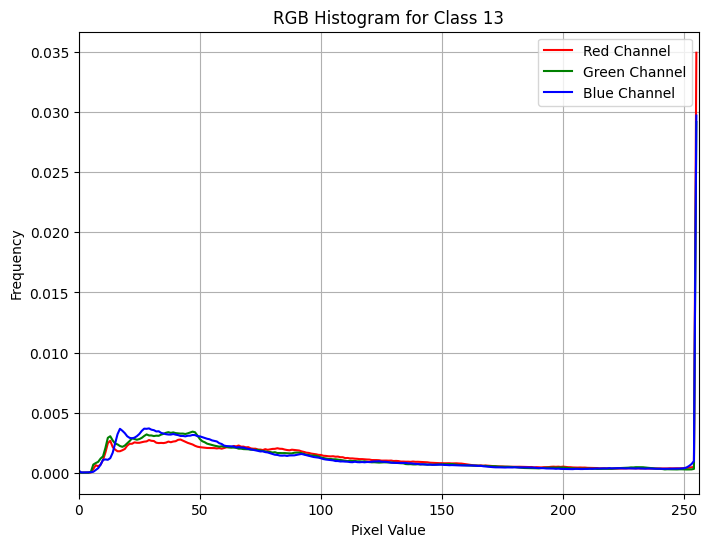

(3, 256, 1)


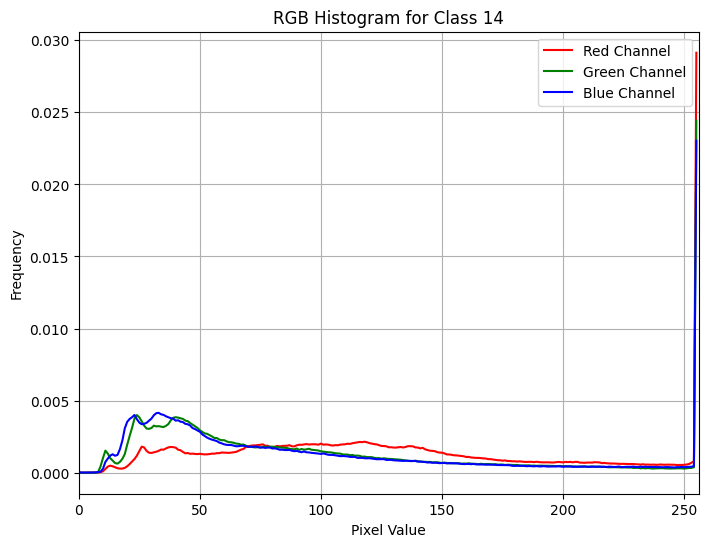

(3, 256, 1)


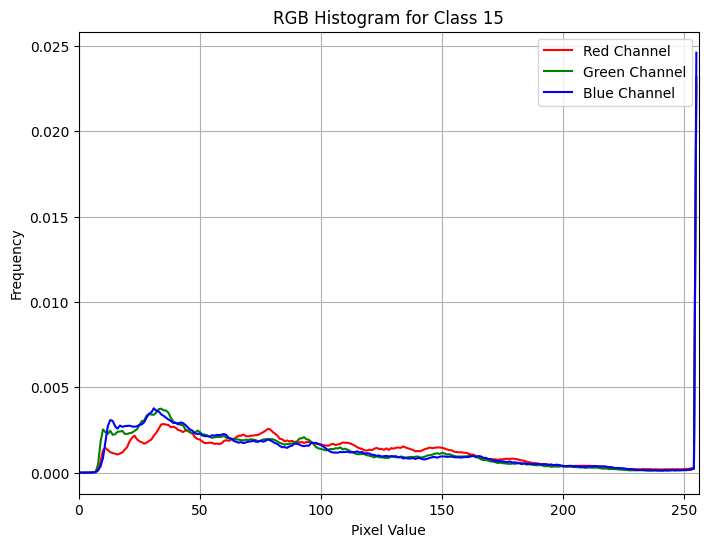

(3, 256, 1)


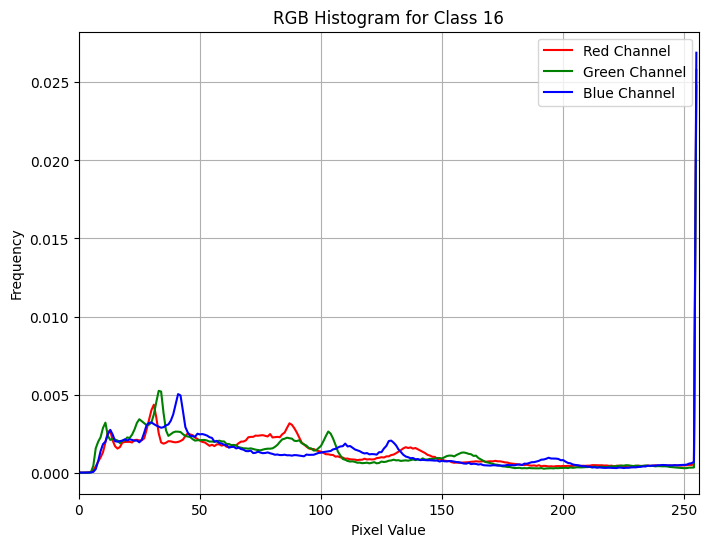

(3, 256, 1)


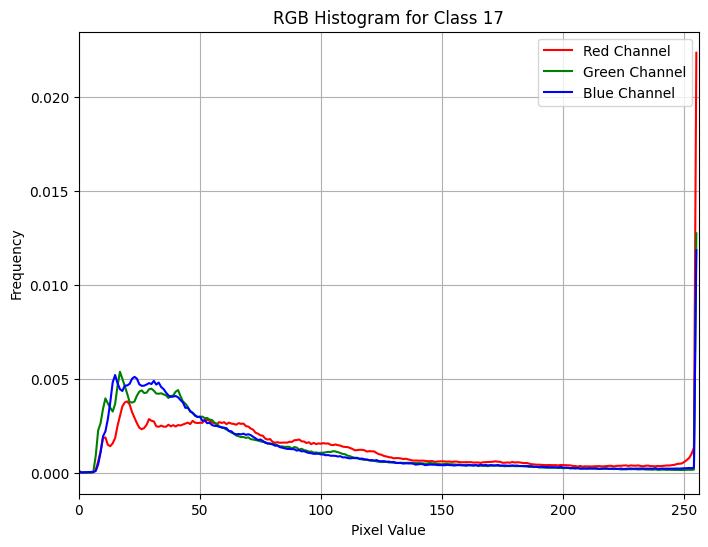

(3, 256, 1)


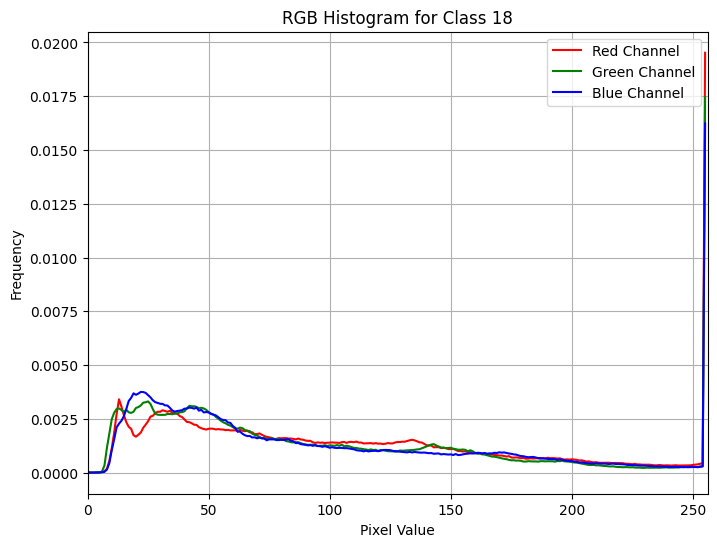

(3, 256, 1)


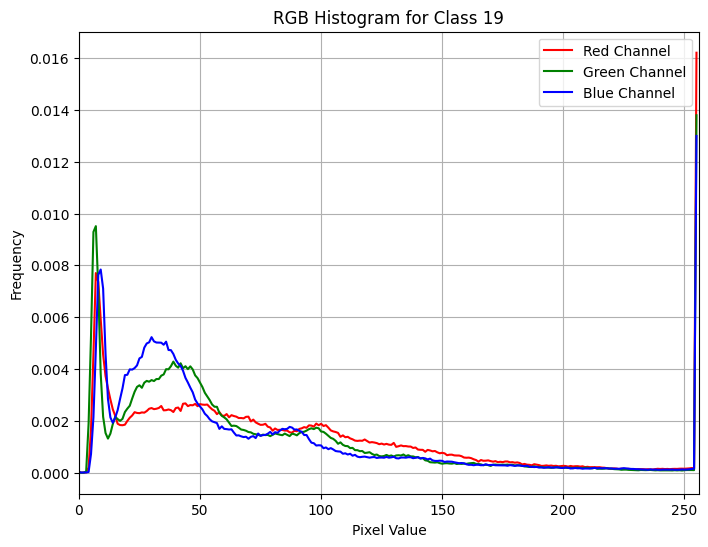

(3, 256, 1)


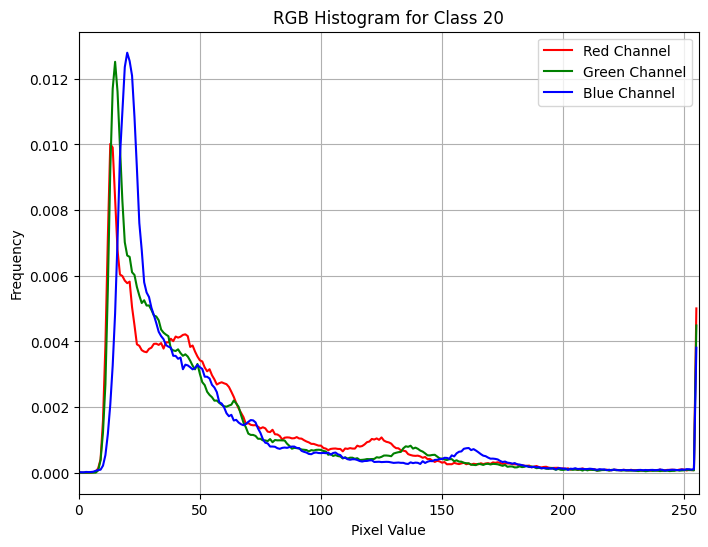

(3, 256, 1)


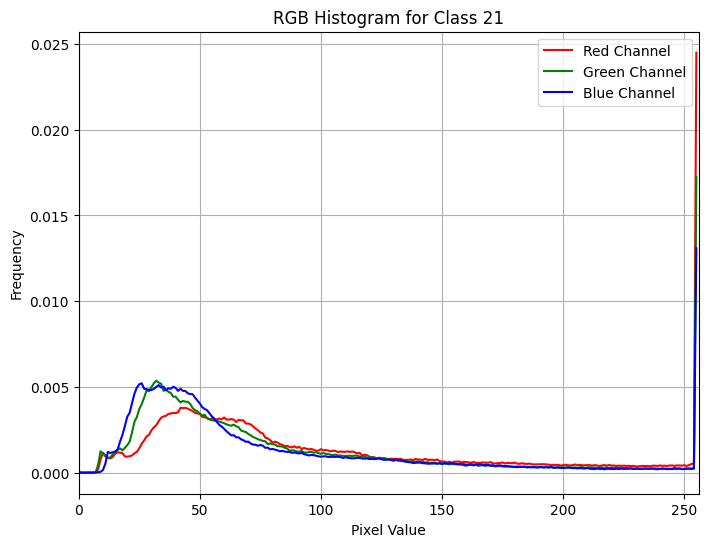

(3, 256, 1)


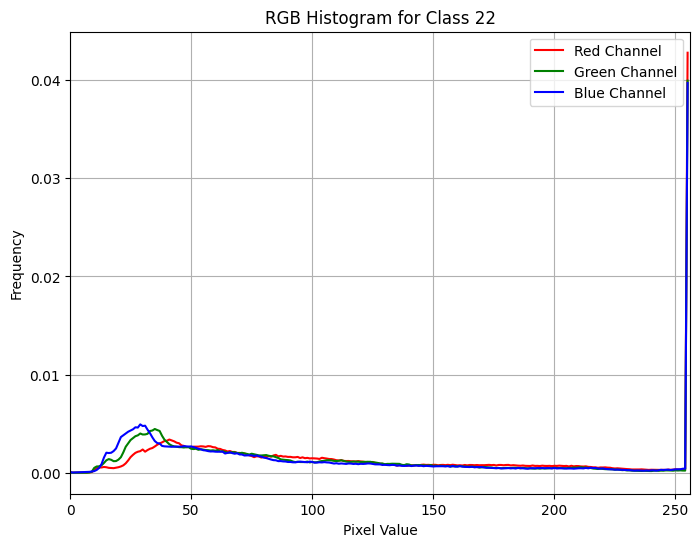

(3, 256, 1)


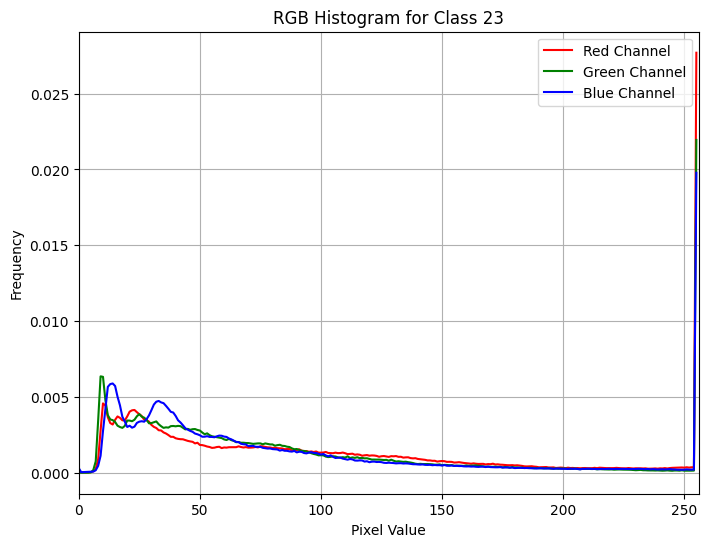

(3, 256, 1)


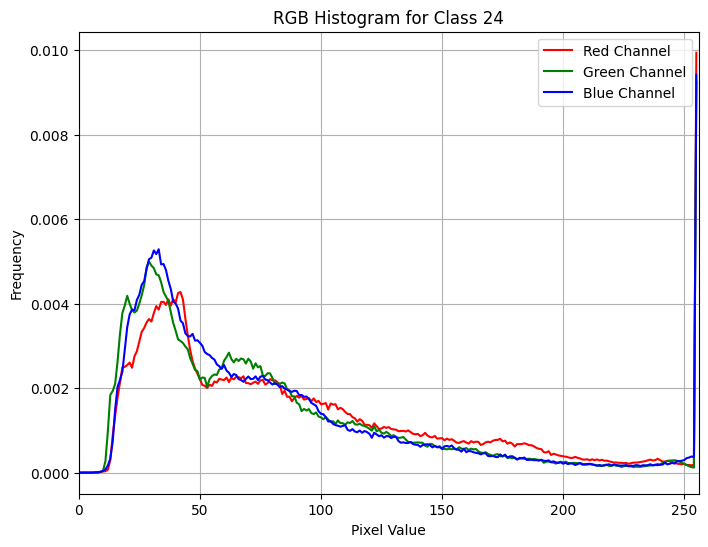

(3, 256, 1)


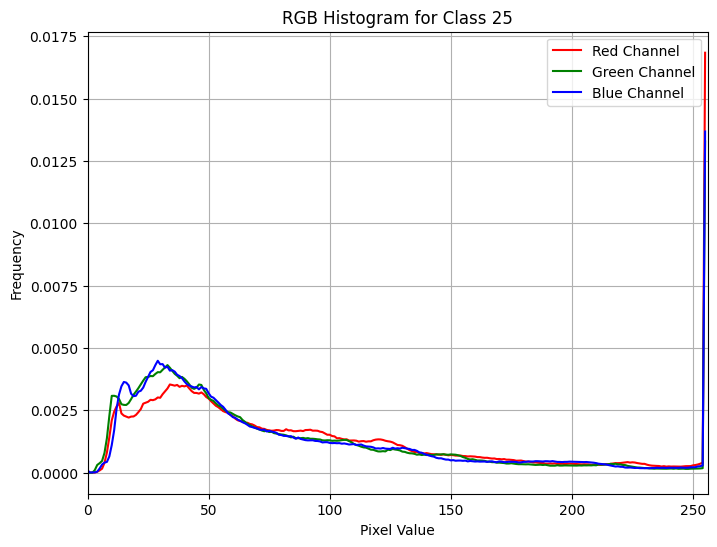

(3, 256, 1)


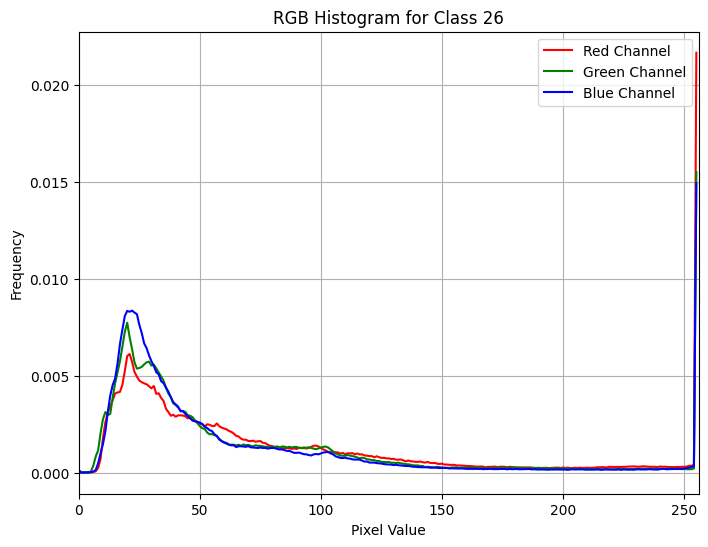

(3, 256, 1)


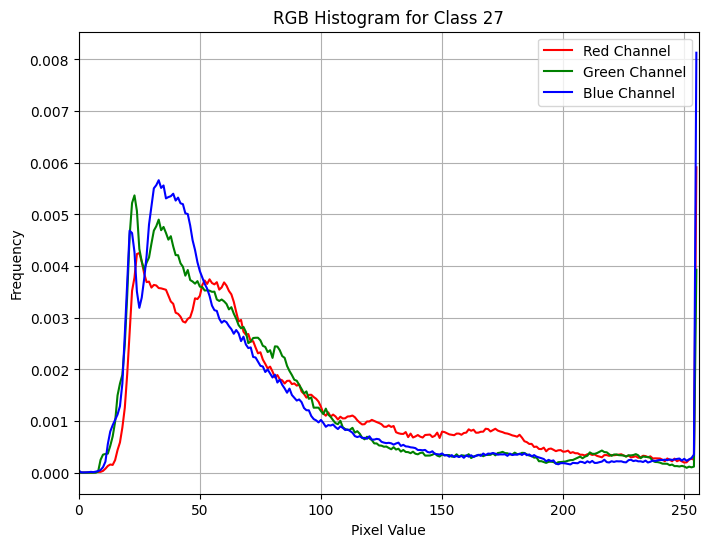

(3, 256, 1)


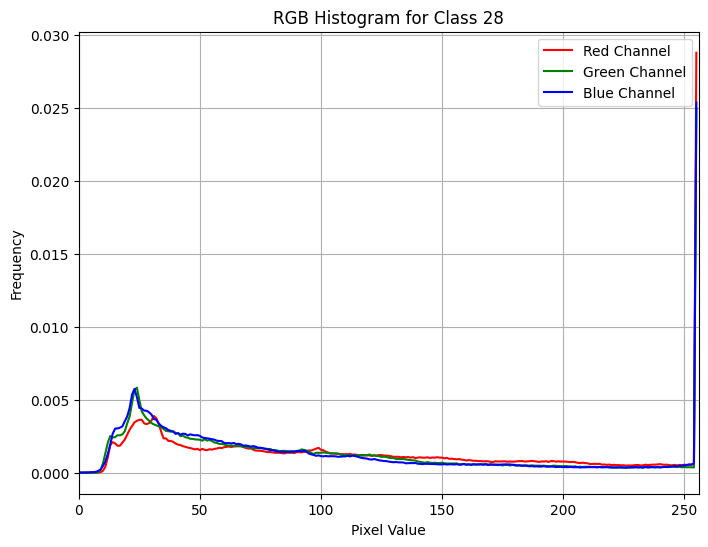

(3, 256, 1)


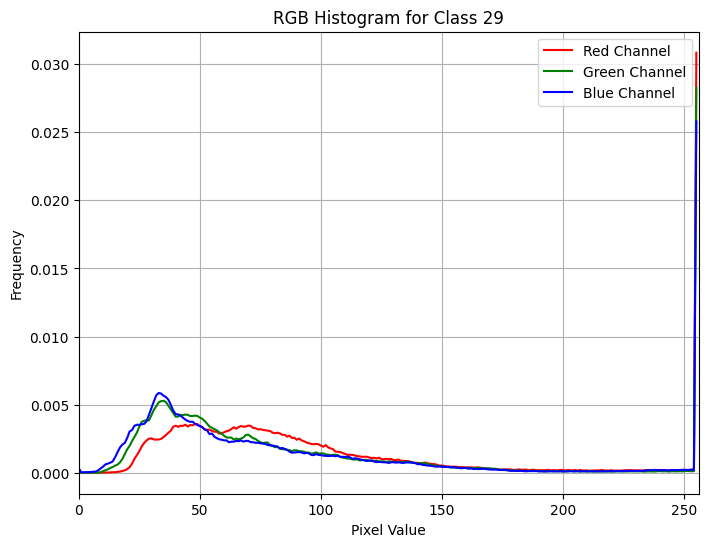

(3, 256, 1)


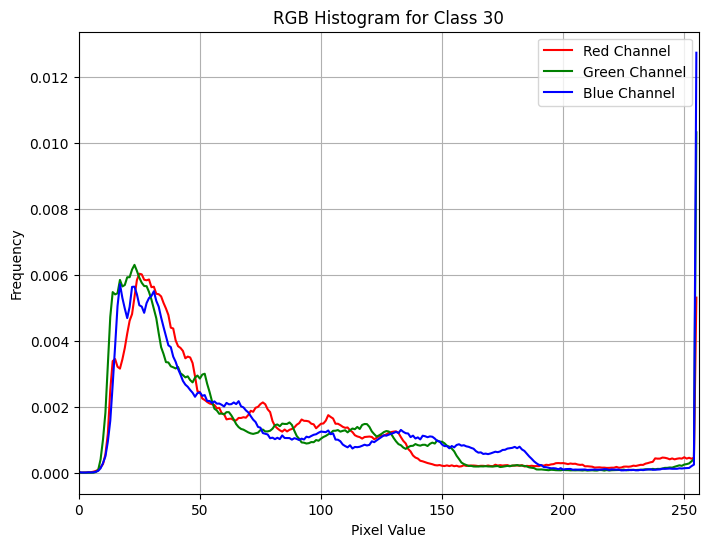

(3, 256, 1)


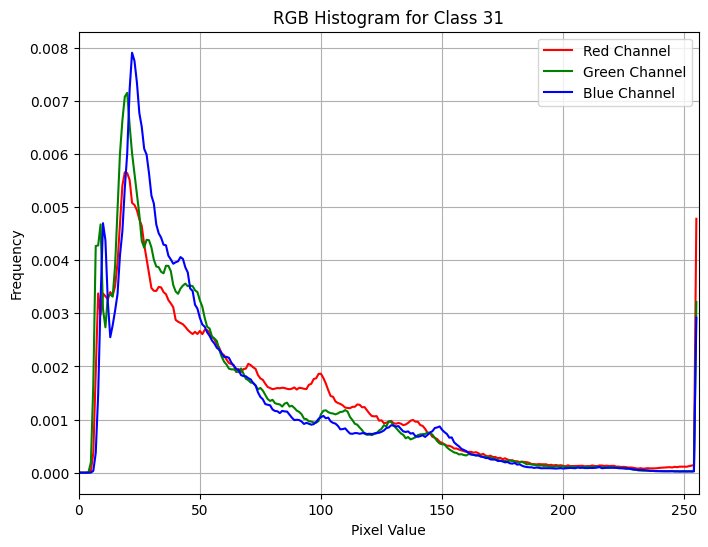

(3, 256, 1)


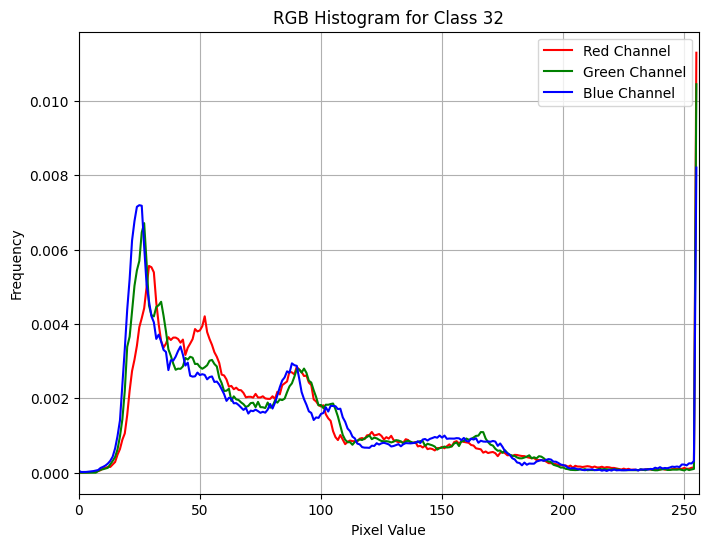

(3, 256, 1)


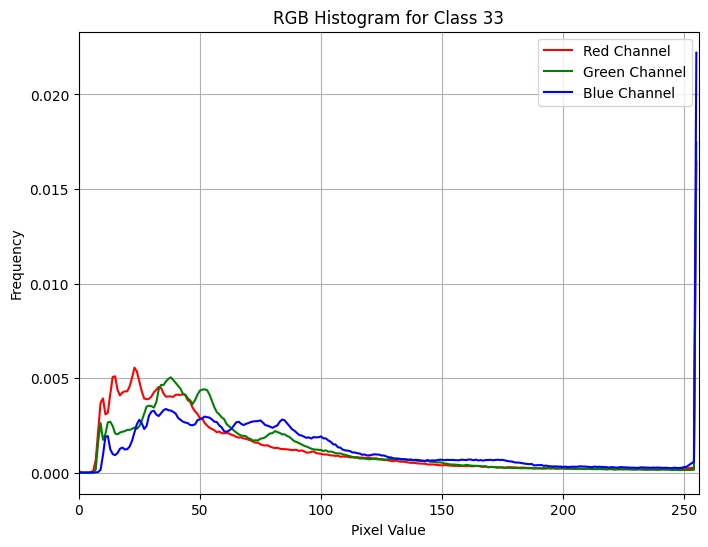

(3, 256, 1)


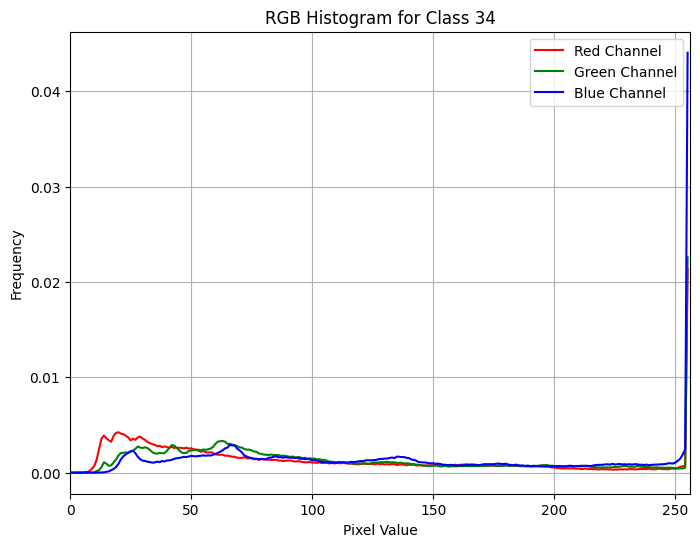

(3, 256, 1)


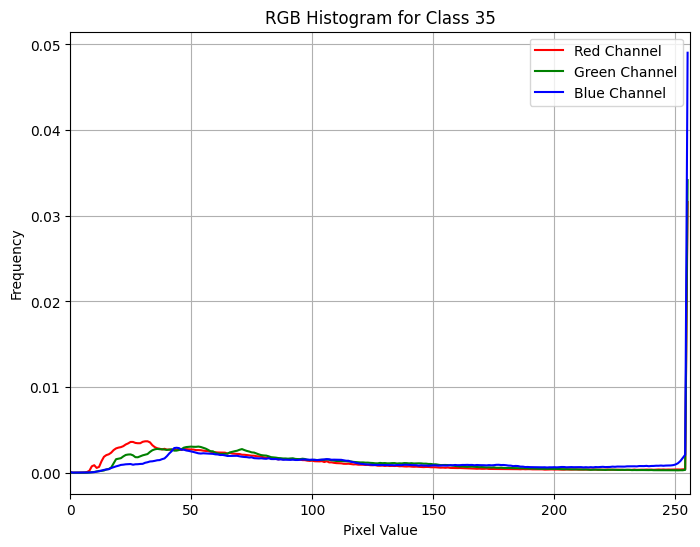

(3, 256, 1)


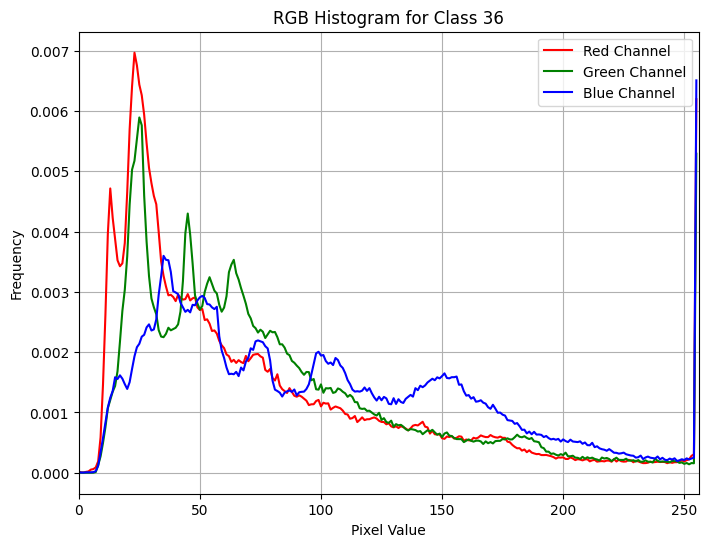

(3, 256, 1)


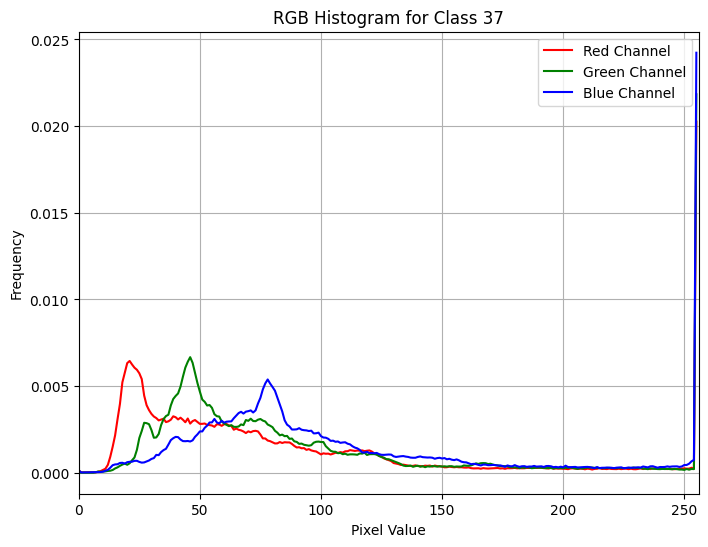

(3, 256, 1)


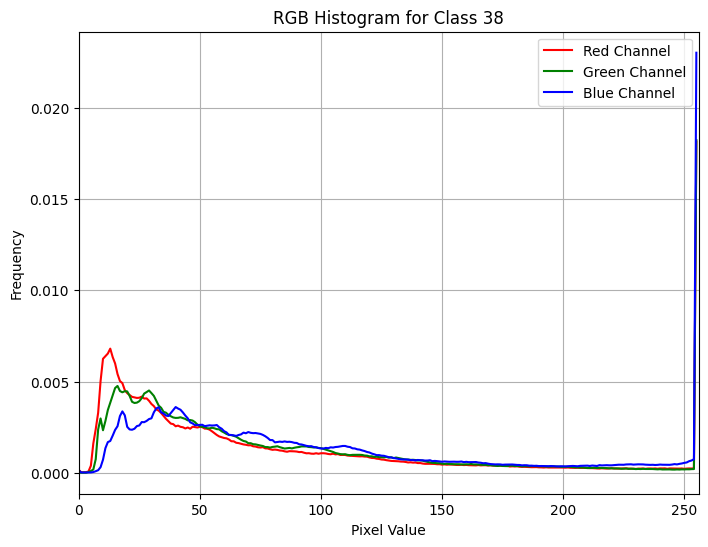

(3, 256, 1)


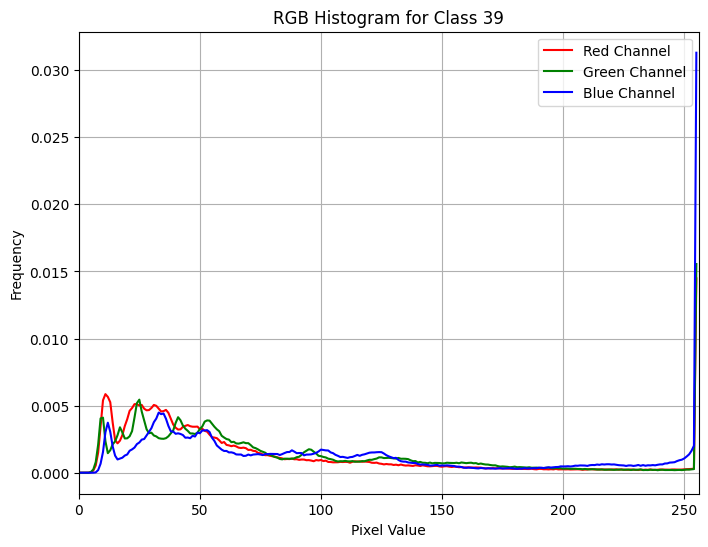

(3, 256, 1)


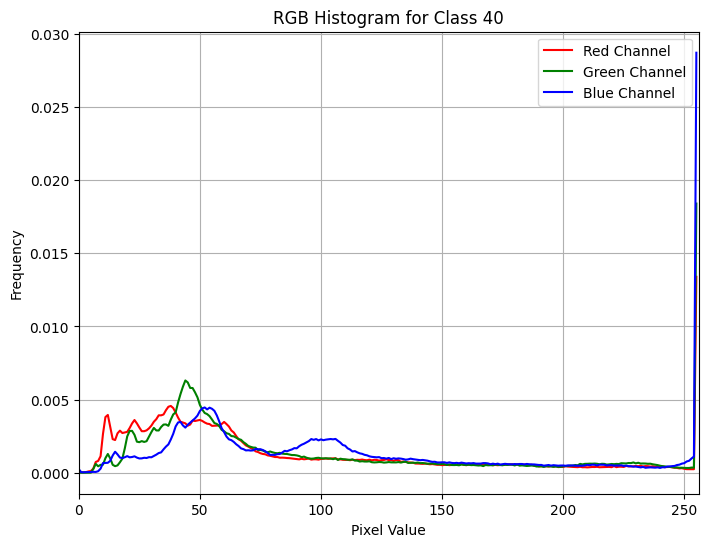

(3, 256, 1)


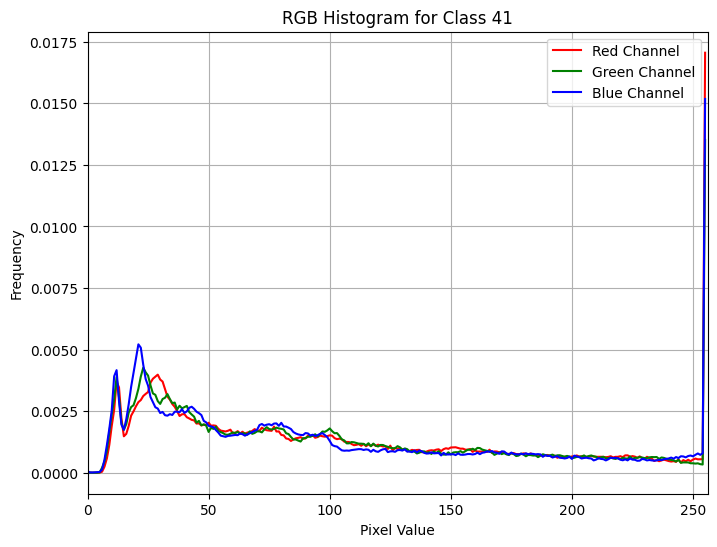

(3, 256, 1)


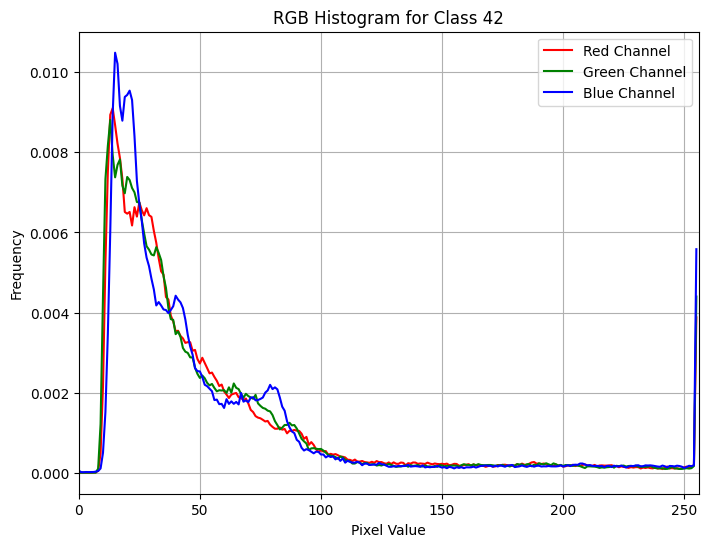

(3, 256, 1)


In [13]:
# plot histogram for each class
for class_id, histogram in train_classes_histograms.items():
    plot_channel_histograms_for_class(class_id, np.squeeze(histogram))
    print(histogram.shape)

In [14]:
# get histograms in HSV quantified
def get_histograms_HSV(class_regions, bins = (10, 10, 10)):
    # Create a dictionary to store histograms for each class
    average_class_histograms = {}
    
    class_images_histograms = {}

    # Iterate through each class
    for class_label, regions in class_regions.items():
        # Initialize an empty list to store histograms for this class
        histograms_H = []
        histograms_S = []
        histograms_V = []
        
        histograms_HSV = []

        for region in regions:
            # Calculate and store the histogram
            pixel_count = region.size  # Calculate pixel count
            region = cv2.cvtColor(region, cv2.COLOR_BGR2HSV)
            histogram_H = np.array(cv2.calcHist([region], [0], None, [bins[0]], [0, 180])) / pixel_count
            histogram_S = np.array(cv2.calcHist([region], [1], None, [bins[1]], [0, 256])) / pixel_count
            histogram_V = np.array(cv2.calcHist([region], [2], None, [bins[2]], [0, 256])) / pixel_count
            histograms_H.append(histogram_H)
            histograms_S.append(histogram_S)
            histograms_V.append(histogram_V)
            if not class_label in class_images_histograms.keys():
                class_images_histograms[class_label] = []
            # Store separate histograms
            class_images_histograms[class_label].append([histogram_H, histogram_S, histogram_V])
        # Compute the average histogram for the class
        average_histogram_H = np.mean(np.array(histograms_H), axis=0)
        average_histogram_S = np.mean(np.array(histograms_S), axis=0)
        average_histogram_V = np.mean(np.array(histograms_V), axis=0)
        # Store the average histogram
        average_class_histograms[class_label] = [average_histogram_H, average_histogram_S, average_histogram_V]
    return average_class_histograms, class_images_histograms

In [15]:
# visualize images
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

Noisy images: [83, 134, 104, 217, 79]


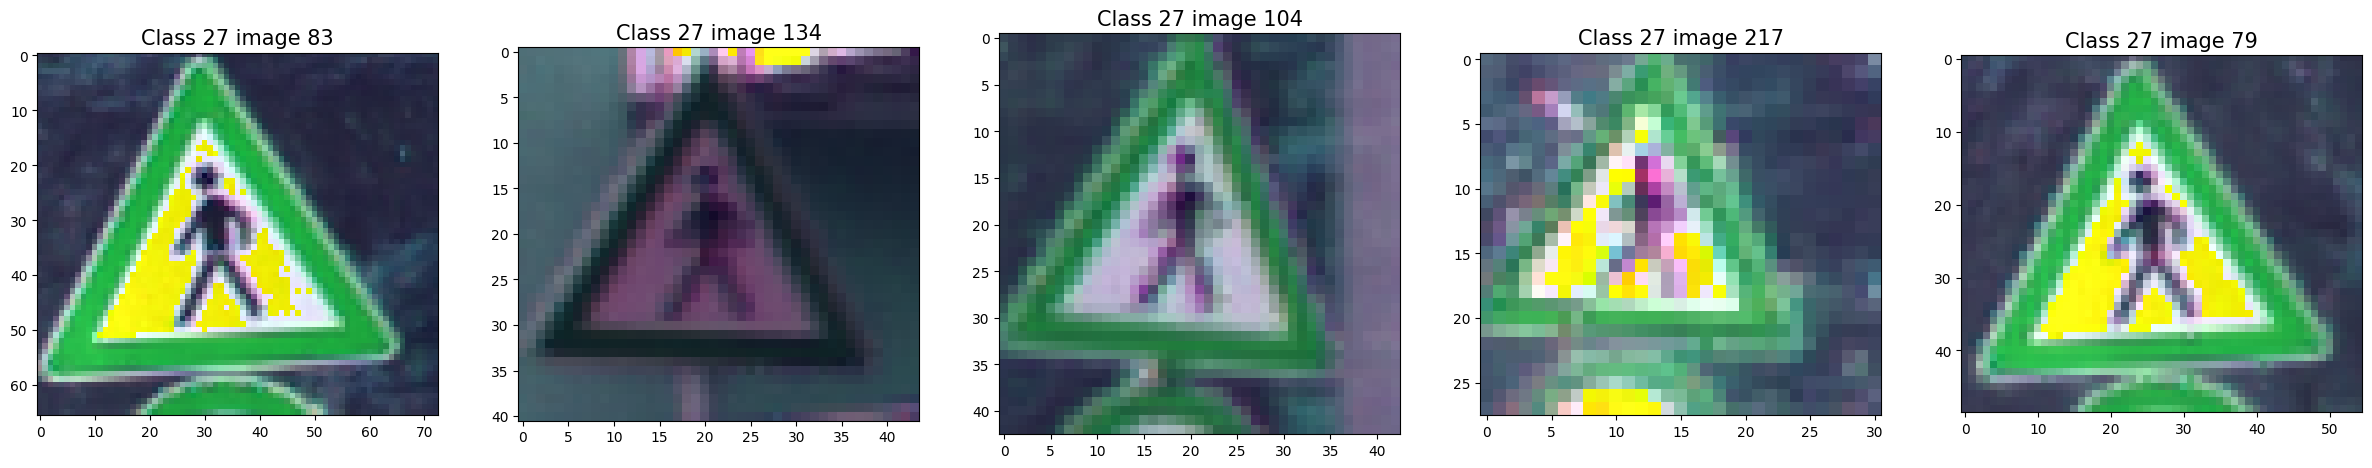

In [16]:
# Lets analyze anomaly in dataset
# put some random channels switch to the channels
desired_class = 27

noisy_image_count = 5
indices_for_noise = random.sample(range(len(train_dict[desired_class])), noisy_image_count)

images_show = []
titles_show = []

print(f'Noisy images: {indices_for_noise}')
for i in indices_for_noise:
    b, g, r = cv2.split(train_dict[desired_class][i])
    
    # increase green color intensity
    g += 25
    
    # Swap the first (blue) and second (green) channels
    train_dict[desired_class][i] = cv2.merge([g, r, b])
    
    # to visualize
    images_show.append(train_dict[desired_class][i])
    titles_show.append('Class ' + str(desired_class) + ' image ' + str(i))                       
show_images(images_show, titles_show)

In [17]:
# make HSV based histograms for analysis
train_classes_histograms_HSV, train_images_histograms_HSV = get_histograms_HSV(train_dict, bins=(5, 3, 3))

In [18]:
def plot_channel_HSV_histograms_for_class(class_label, histograms):
    plt.figure(figsize=(12, 4))
    plt.title(f'HSV Histogram for Class {class_label}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Hue
    plt.subplot(131)
    plt.title('Hue Channel Histogram')
    plt.xlim([0, 180])
    h_scale_factor = 180.0 / max(histograms[0].shape)
    xticks = np.arange(0, 180.0, h_scale_factor)
    plt.plot(xticks, histograms[0], color='red')
    plt.grid()

    # Saturation
    plt.subplot(132)
    plt.title('Saturation Channel Histogram')
    plt.xlim([0, 256])
    s_scale_factor = 256.0 / max(histograms[1].shape)
    xticks = np.arange(0, 256.0, s_scale_factor)
    plt.plot(xticks, histograms[1], color='grey')
    plt.grid()

    # Value
    plt.subplot(133)
    plt.title('Value Channel Histogram')
    plt.xlim([0, 256])
    v_scale_factor = 256.0 / max(histograms[2].shape)
    xticks = np.arange(0, 256.0, v_scale_factor)
    plt.plot(xticks, histograms[2], color='gold')
    plt.grid()

    plt.tight_layout()
    plt.show()

/Users/rytis/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)
/var/folders/lg/9zhrbtxs2wb2227l39_4zqx00000gn/T/ipykernel_4896/2065458000.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131)


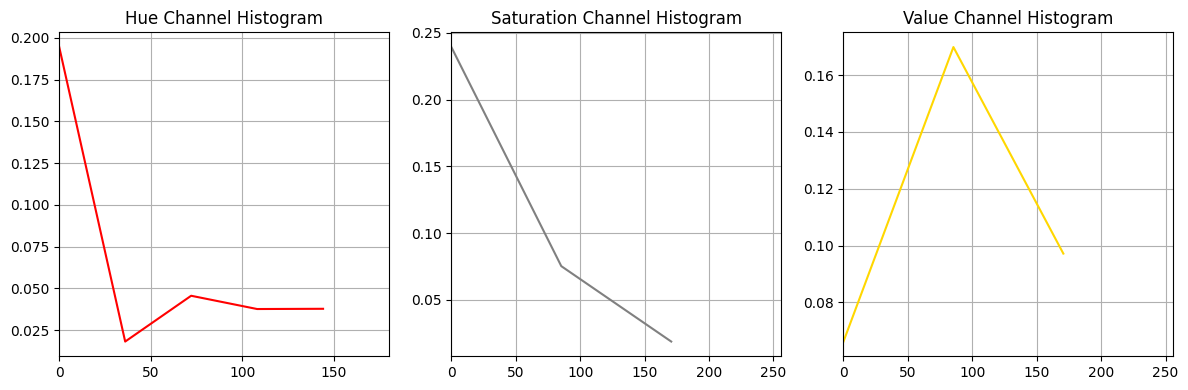

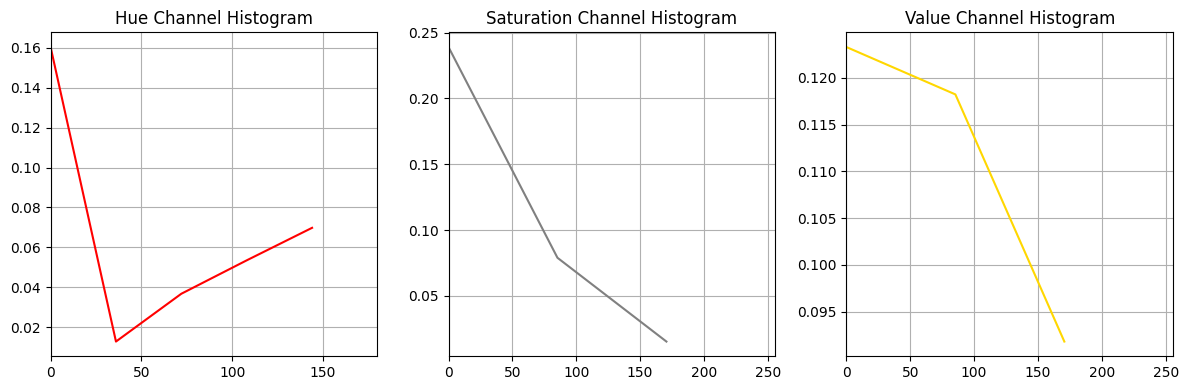

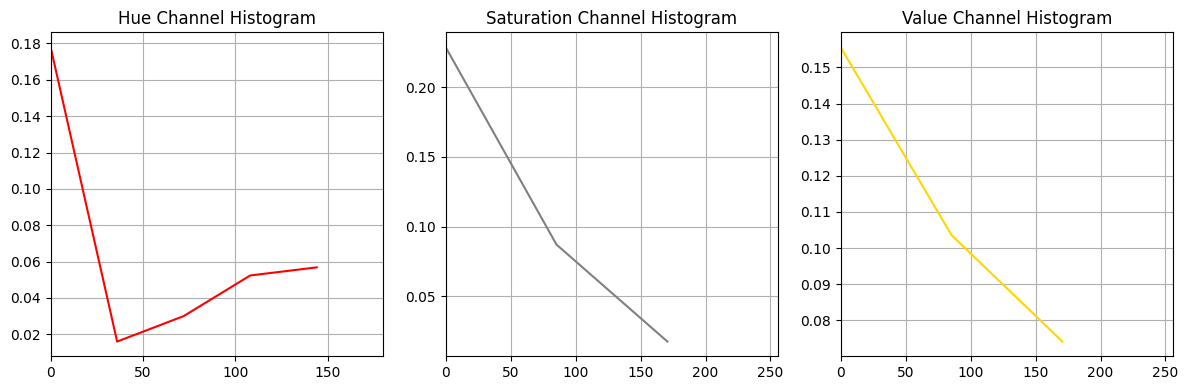

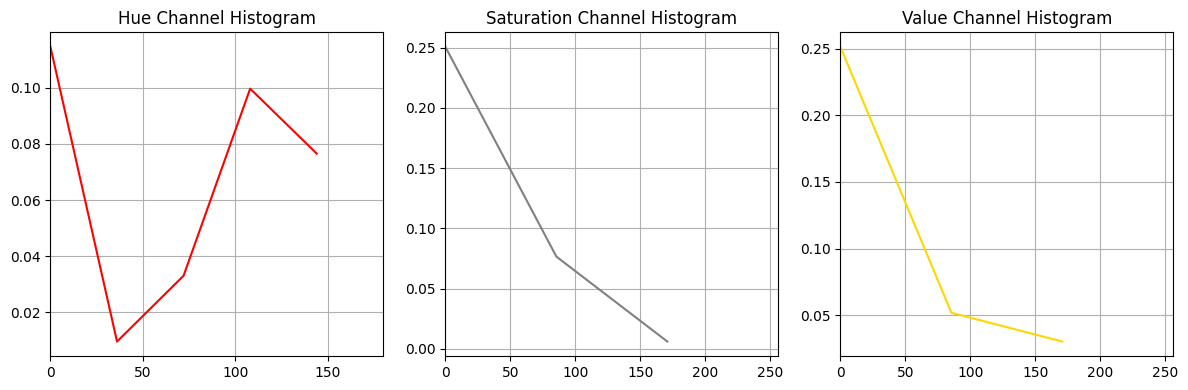

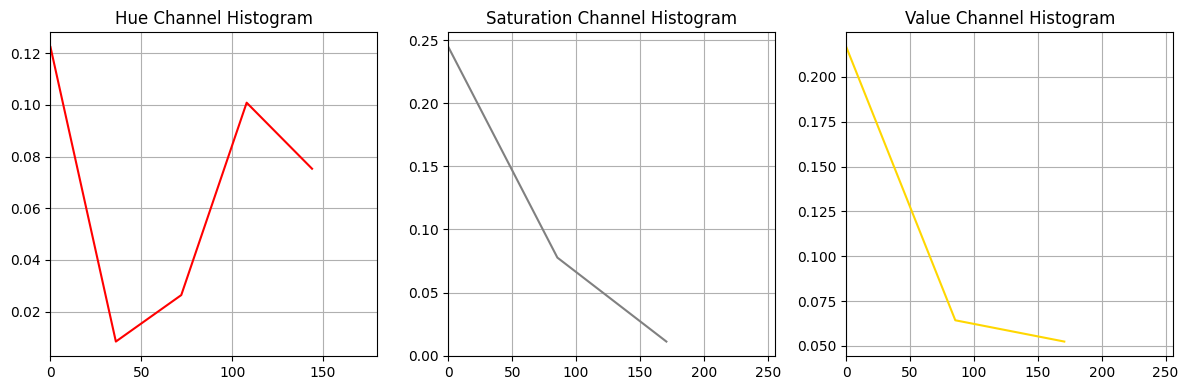

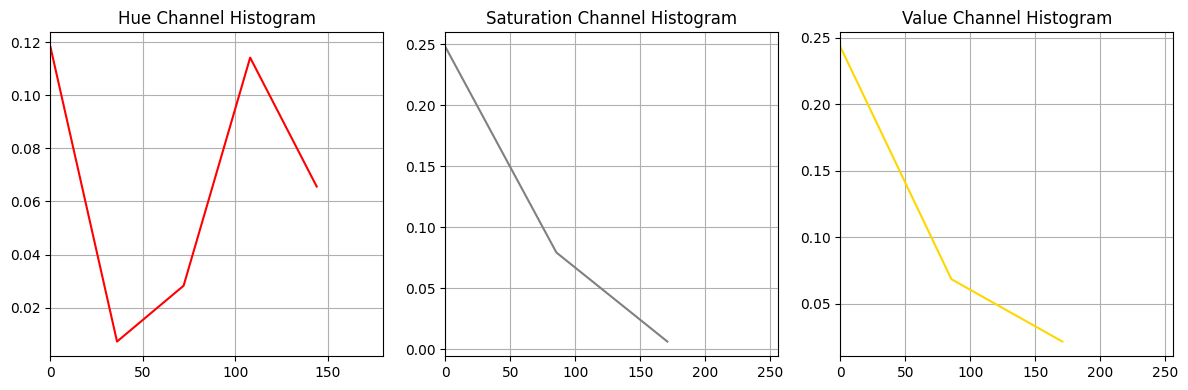

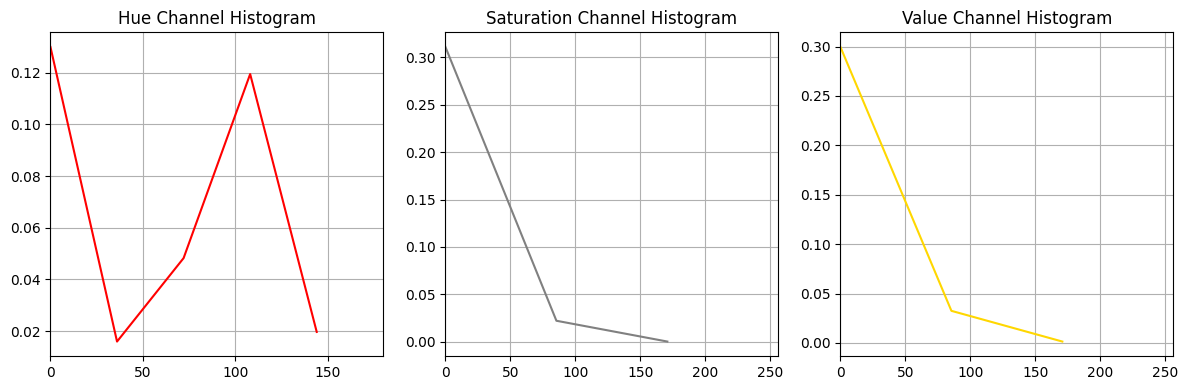

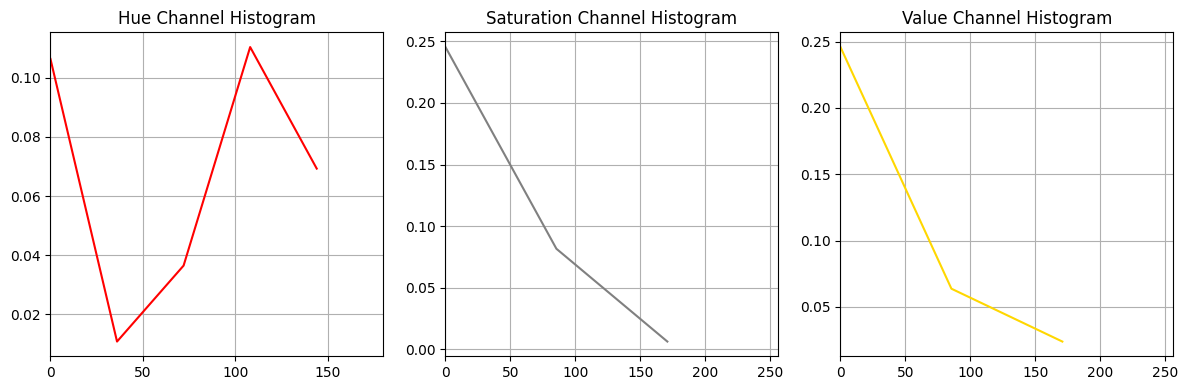

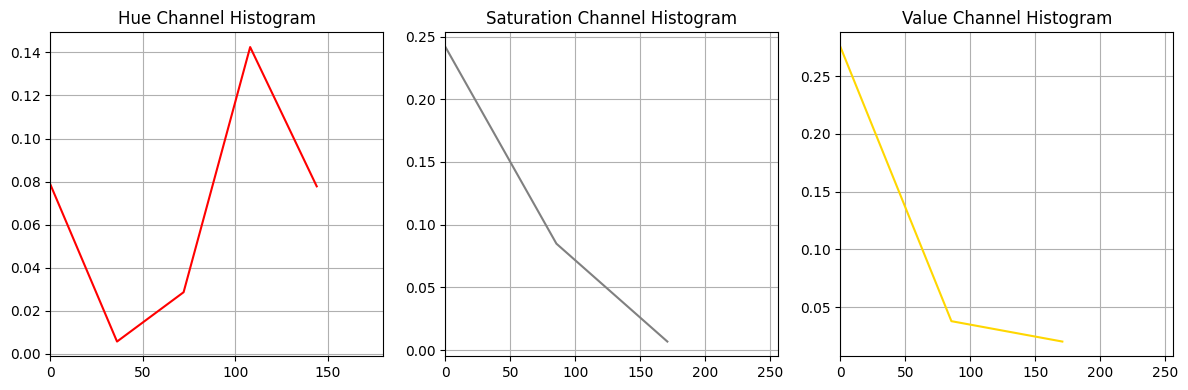

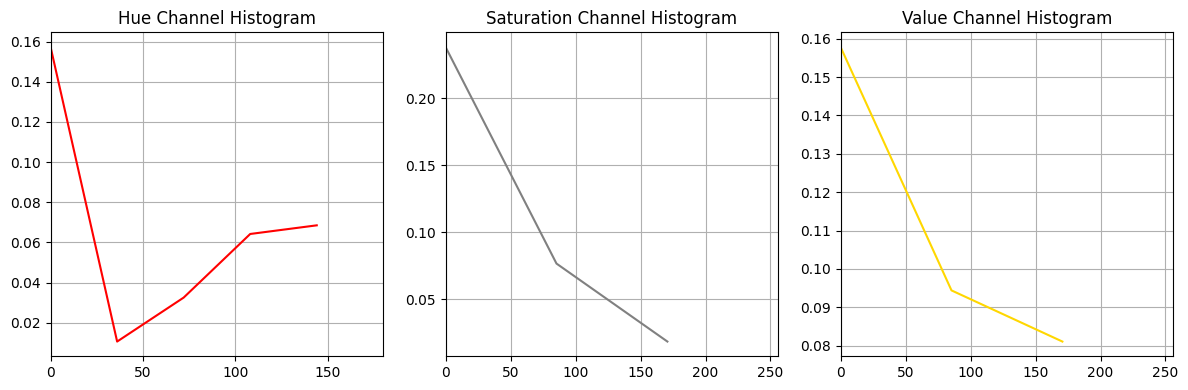

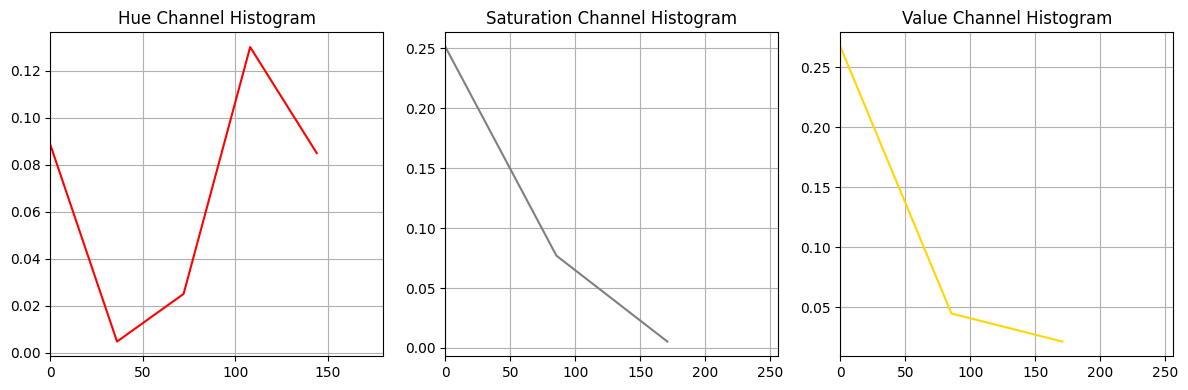

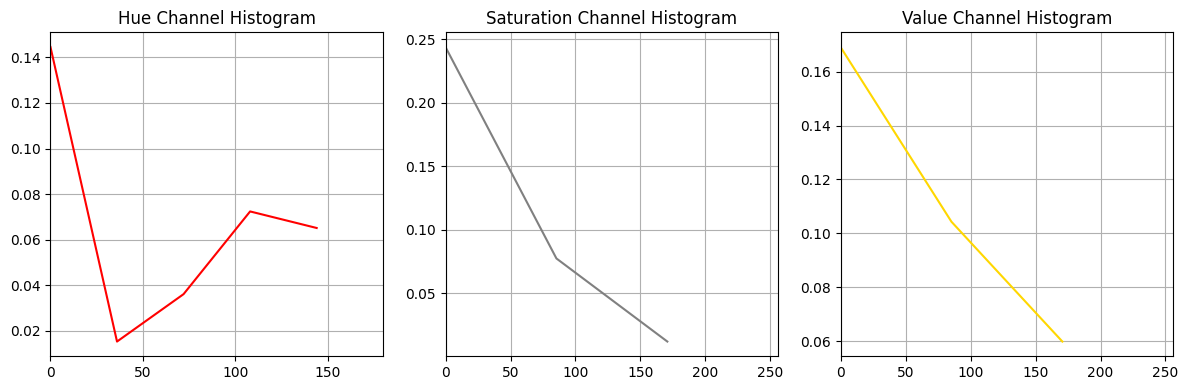

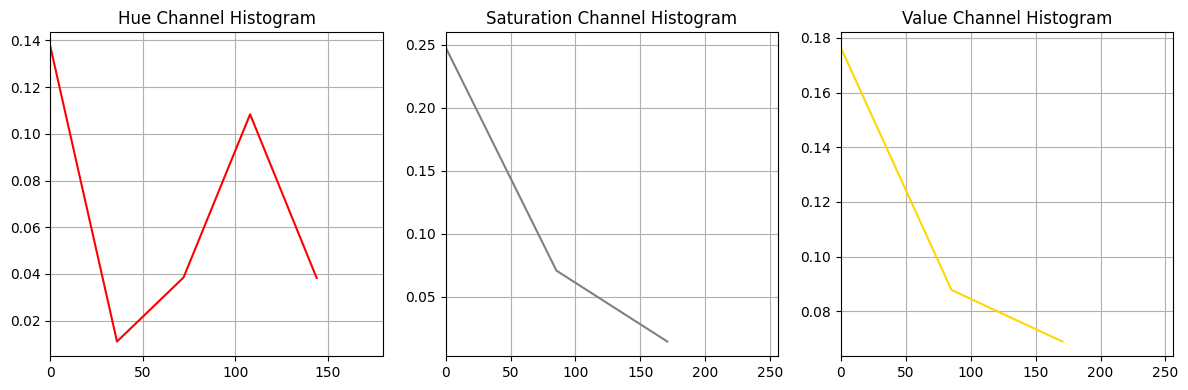

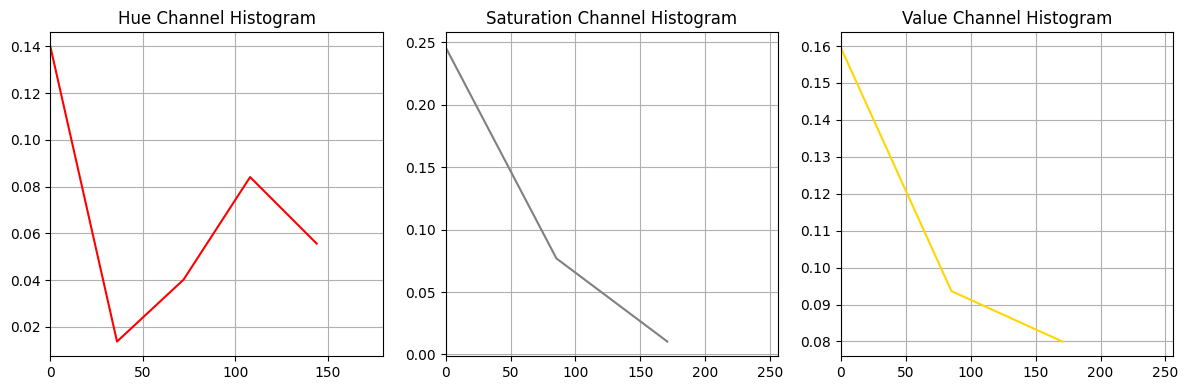

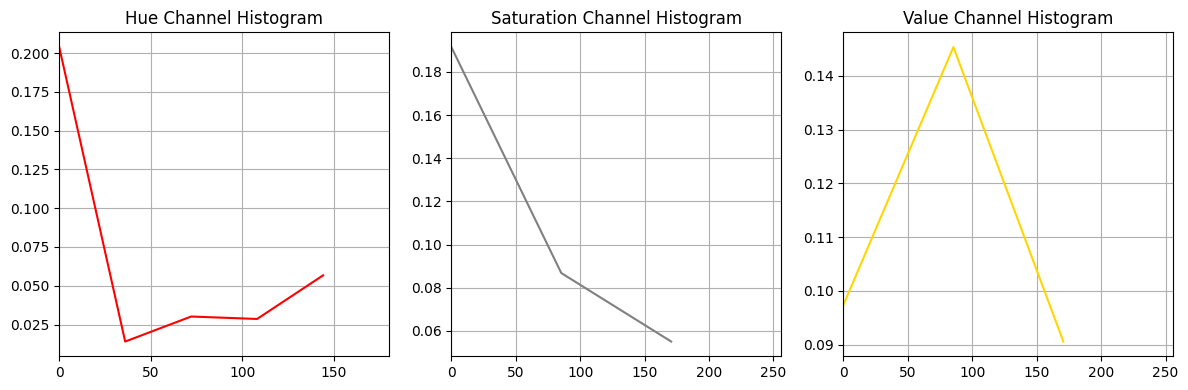

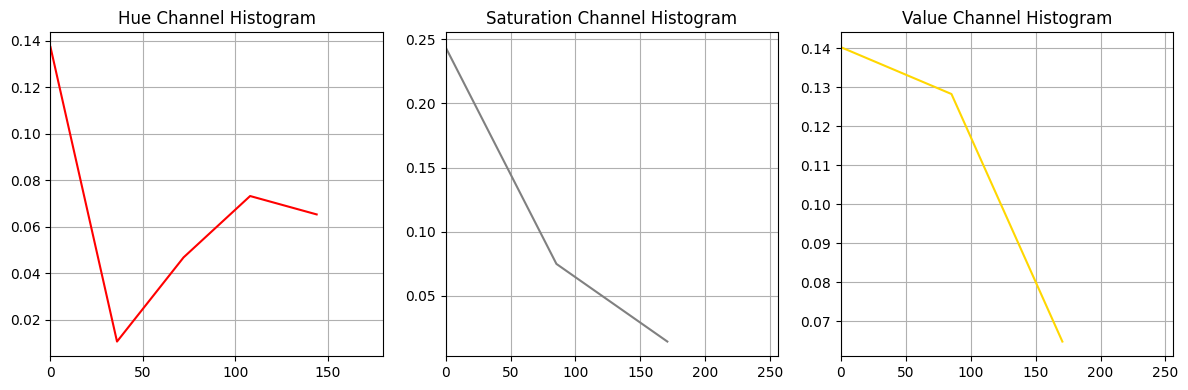

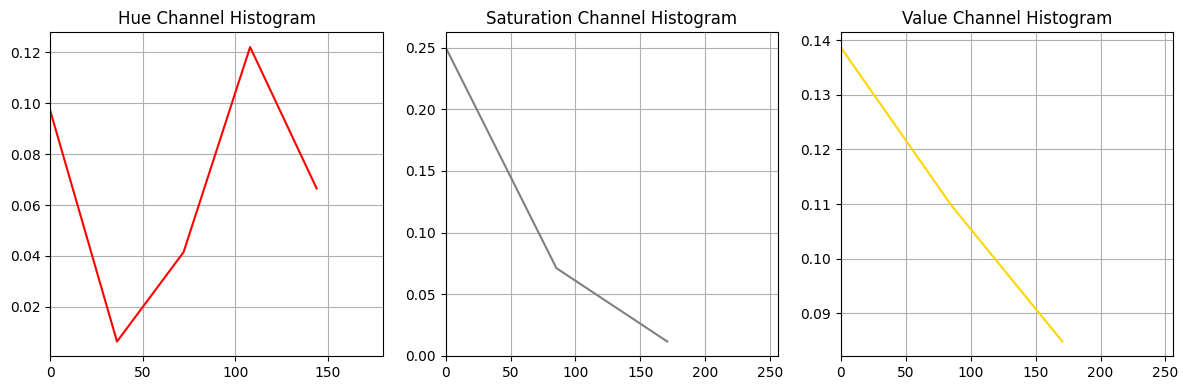

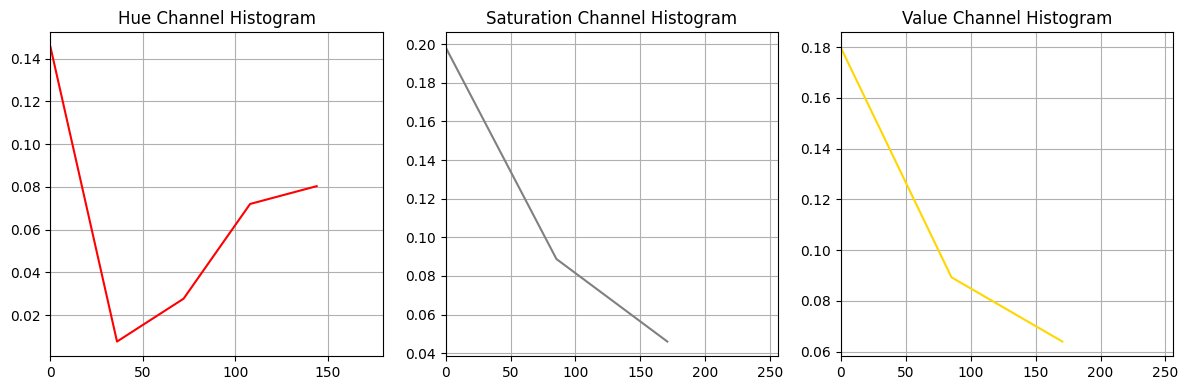

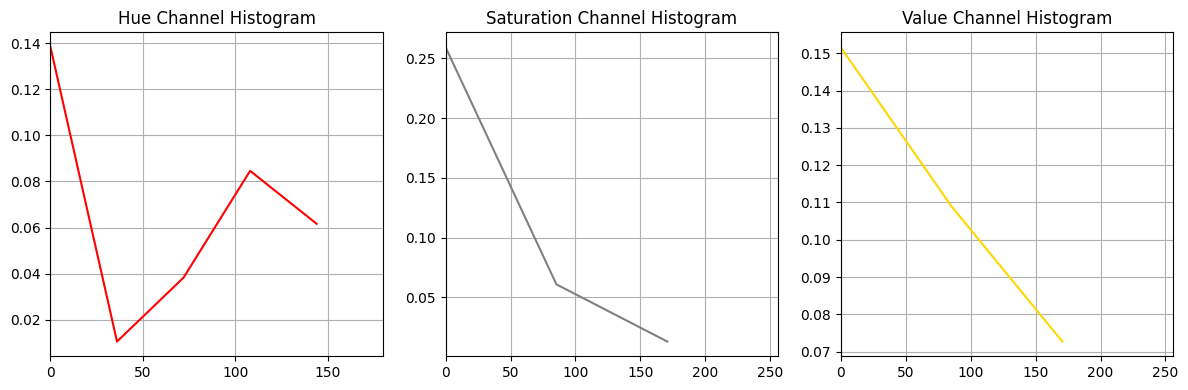

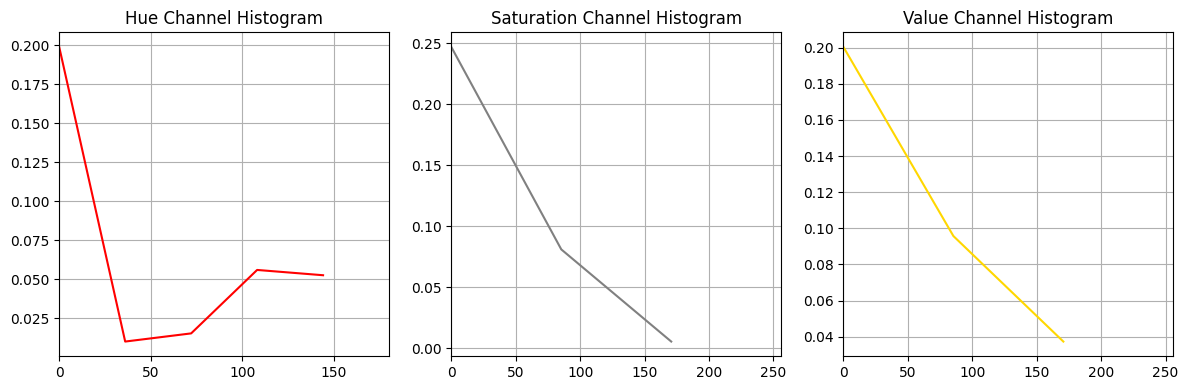

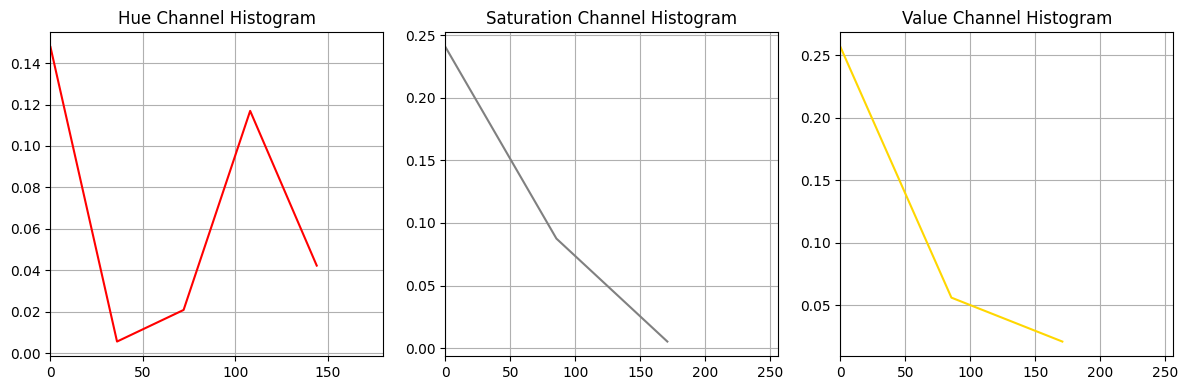

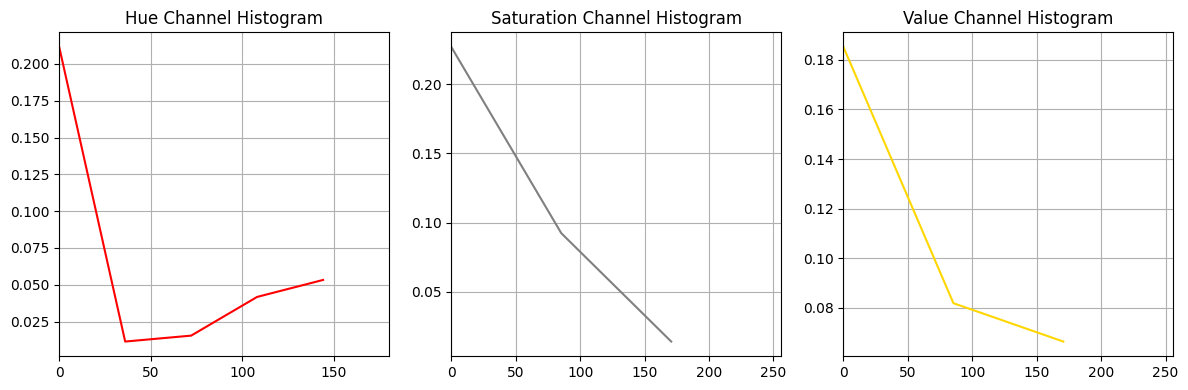

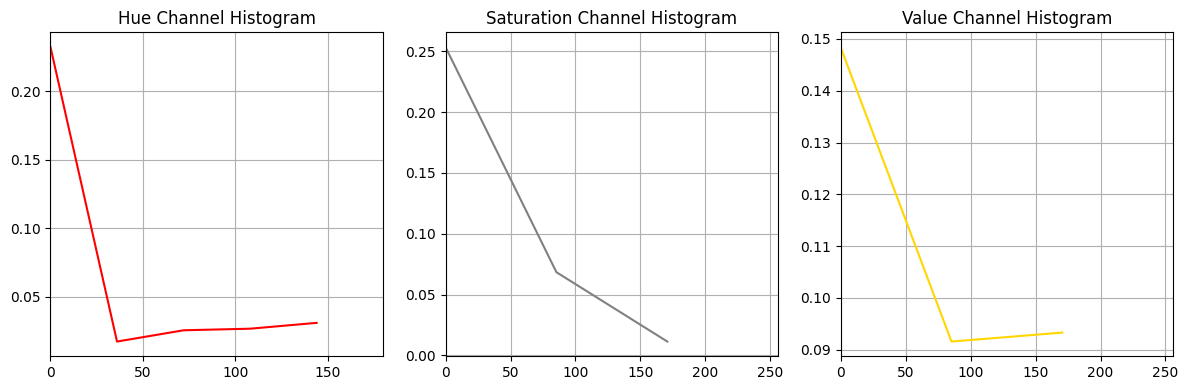

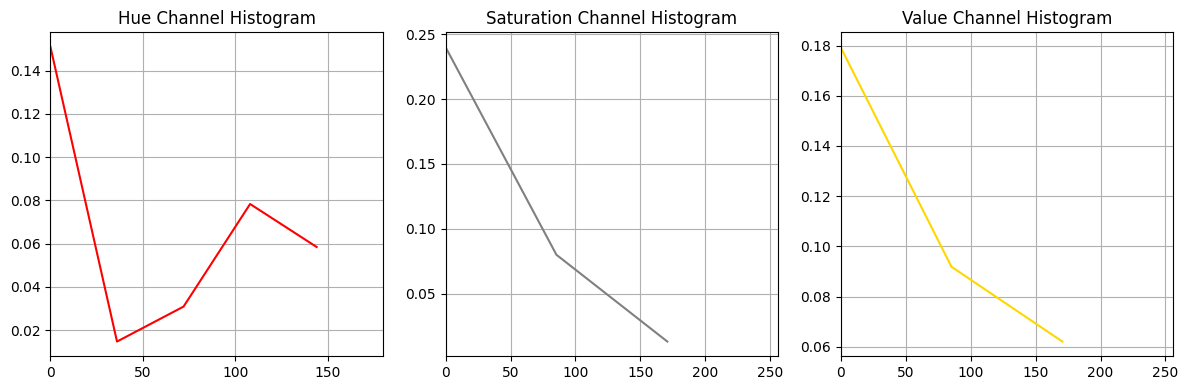

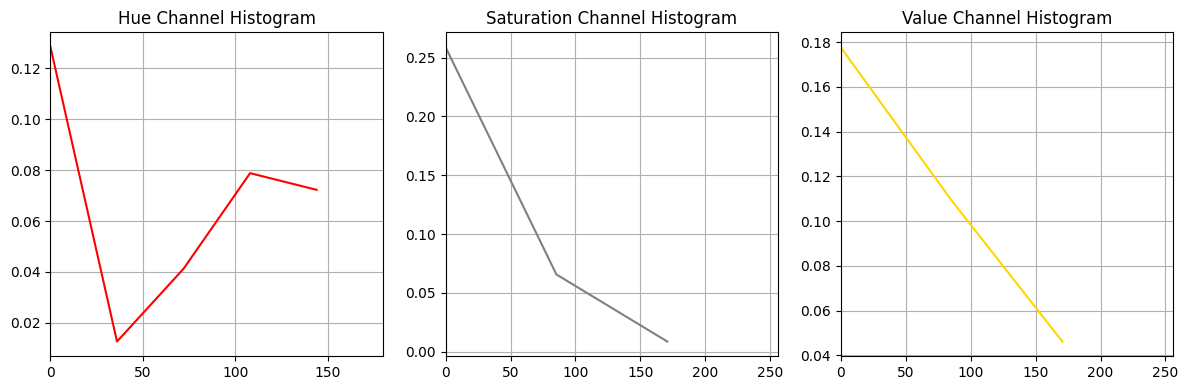

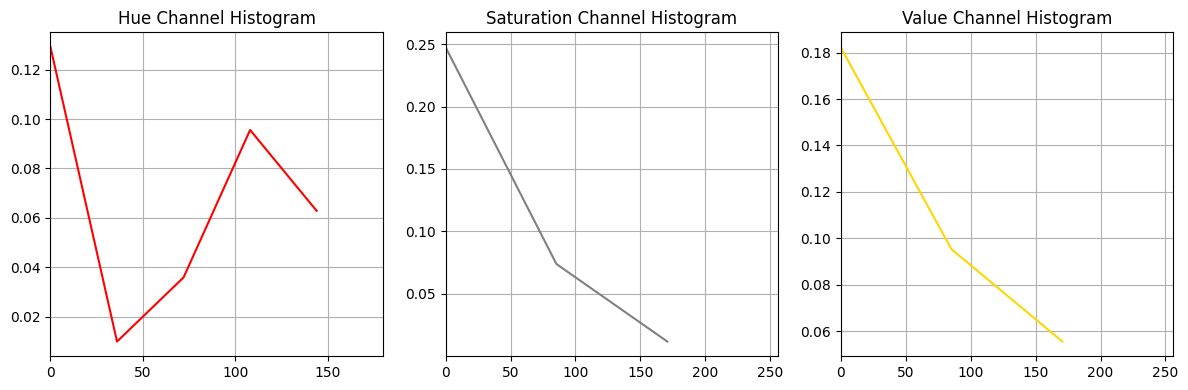

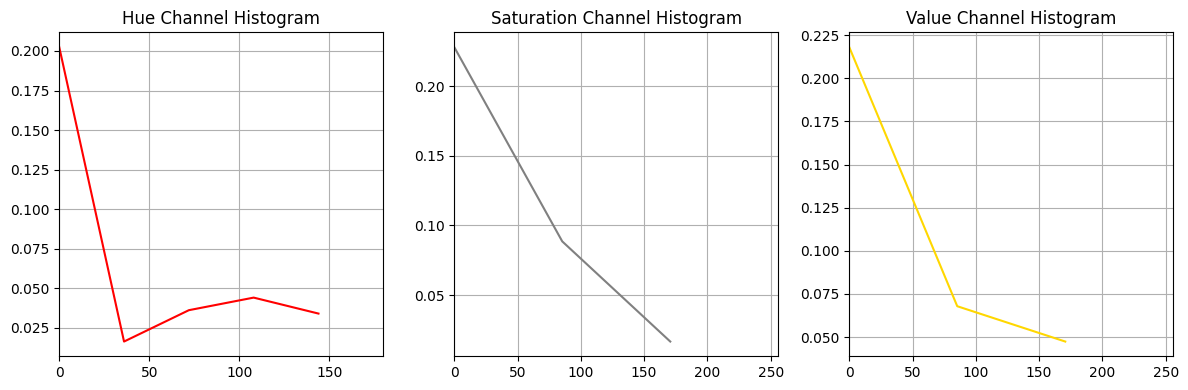

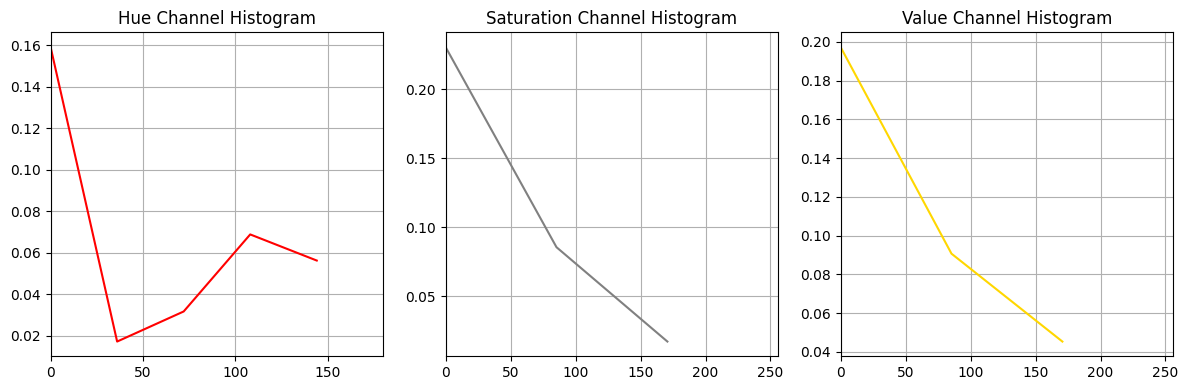

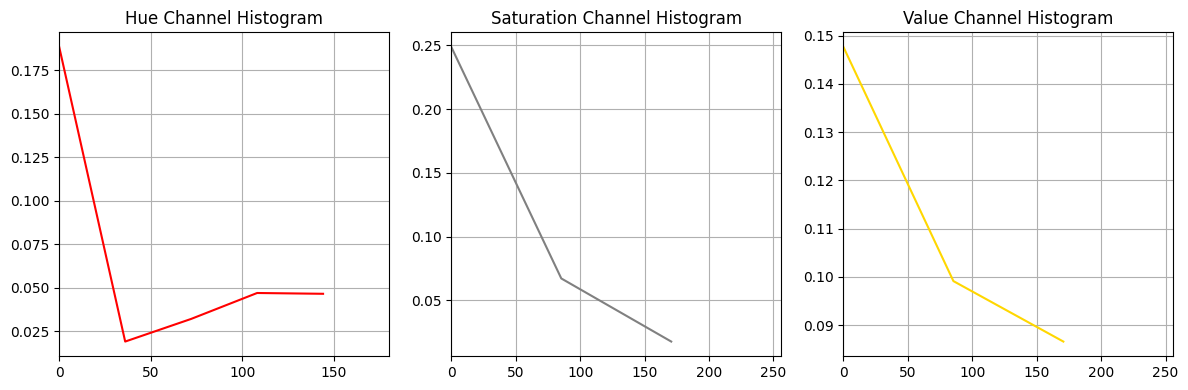

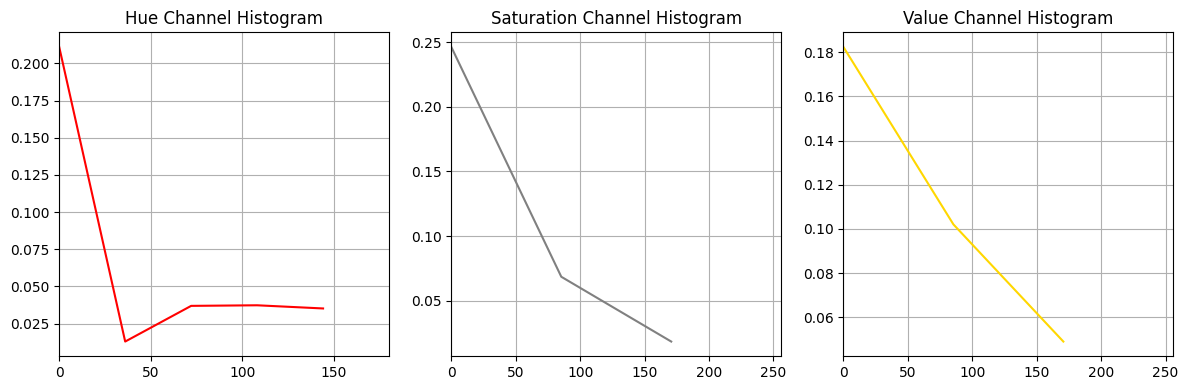

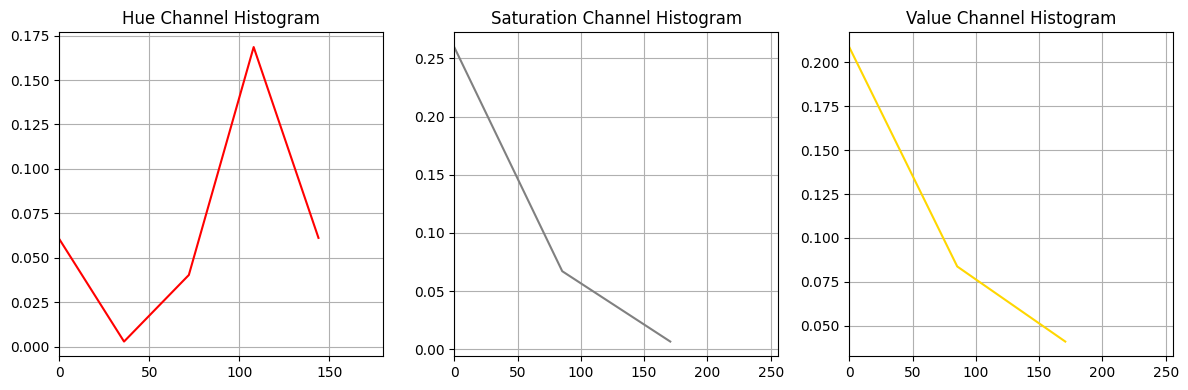

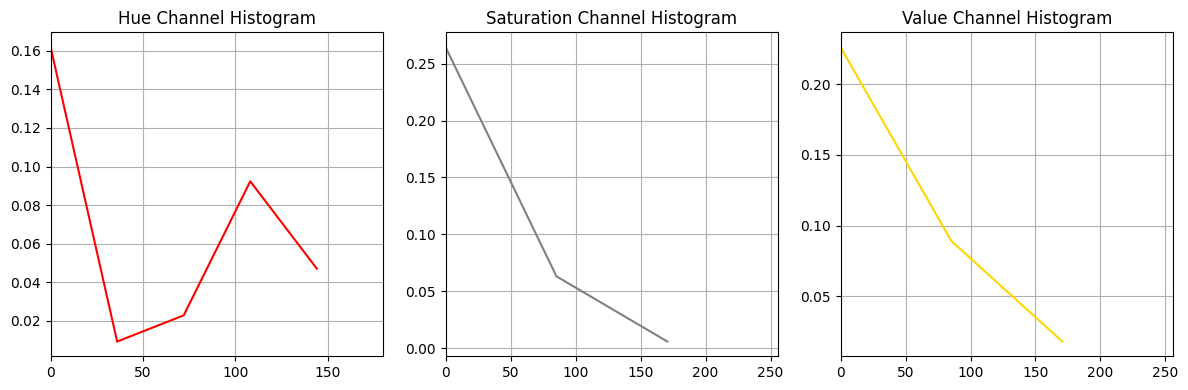

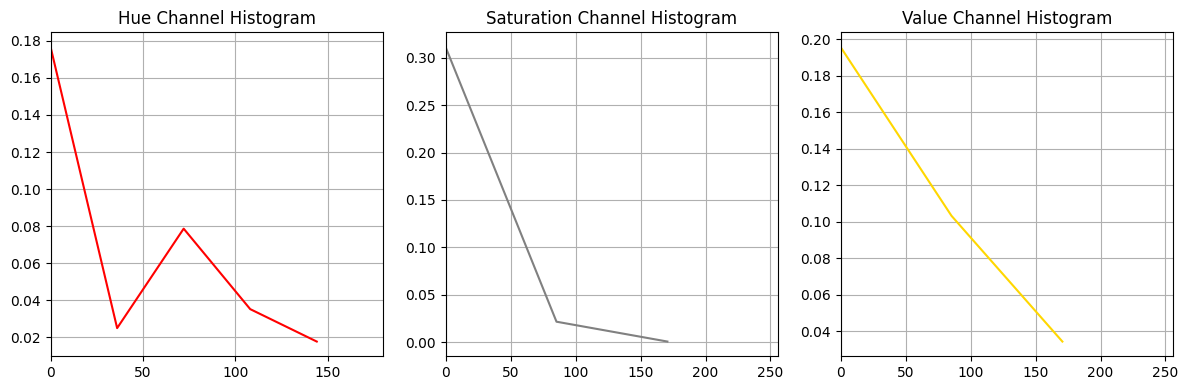

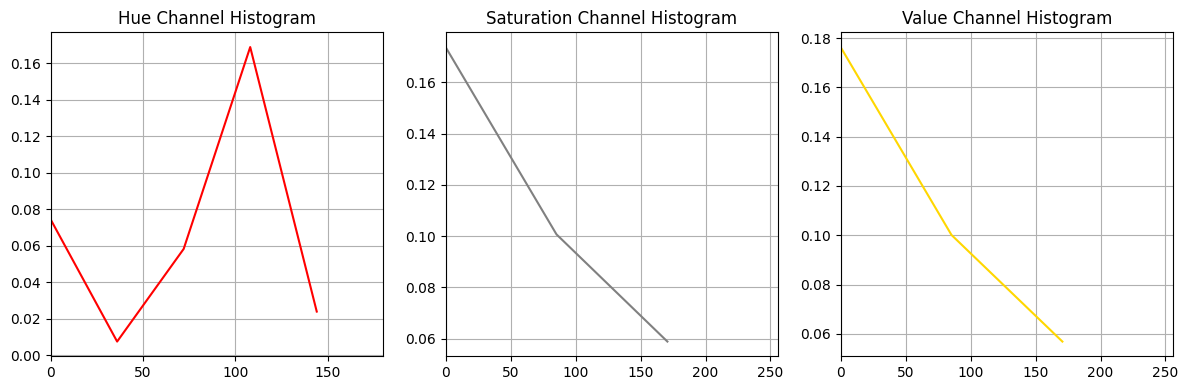

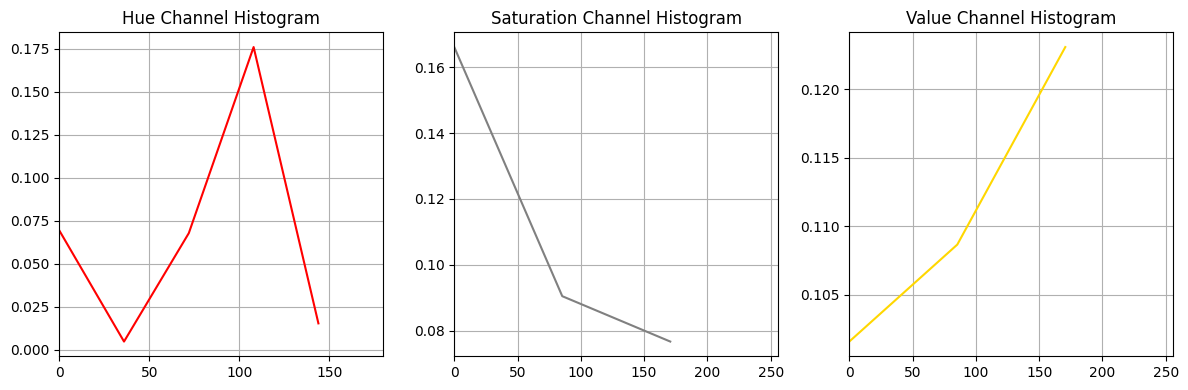

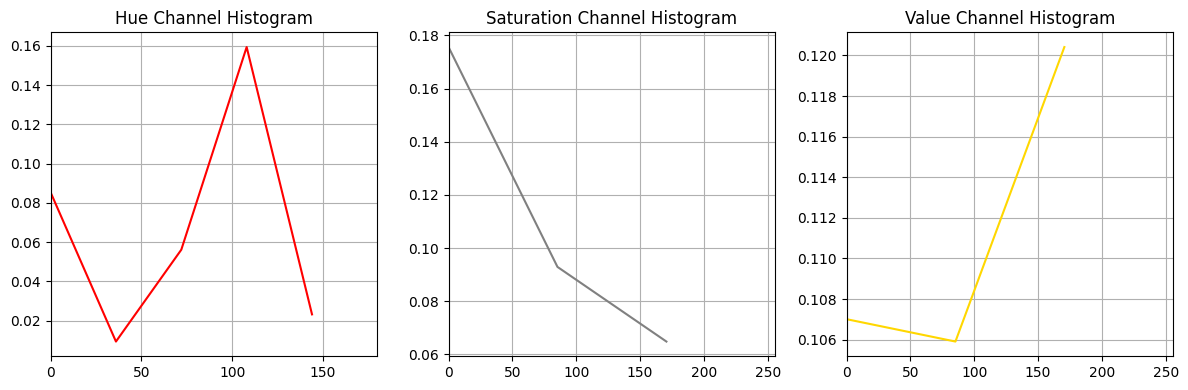

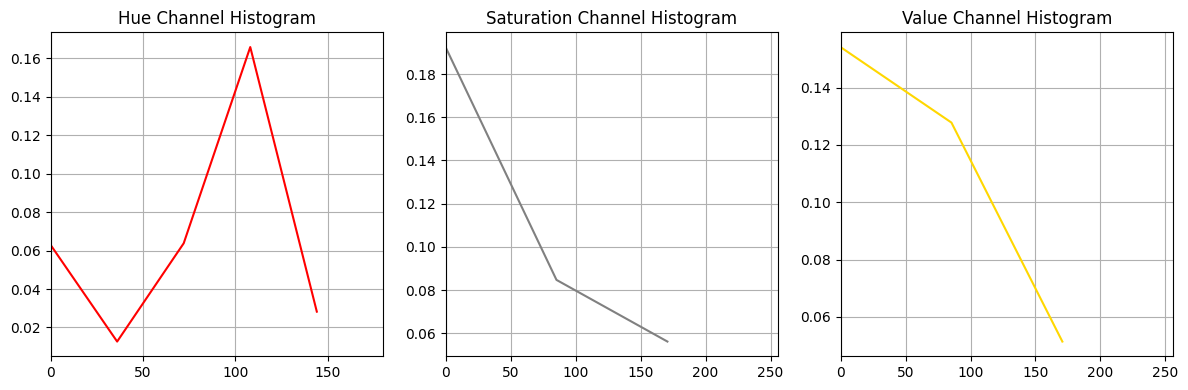

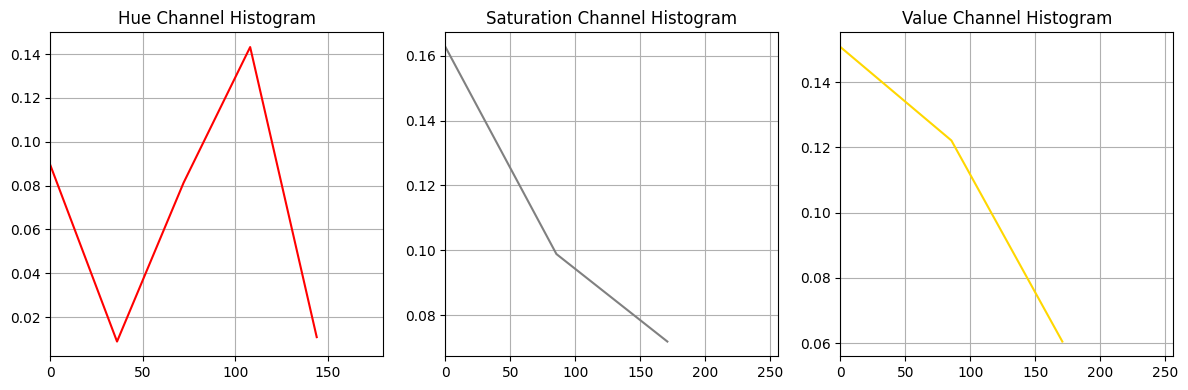

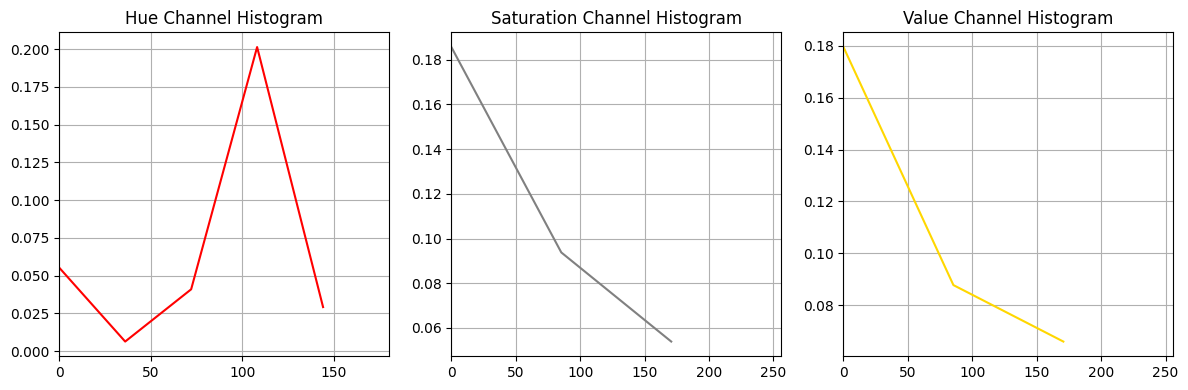

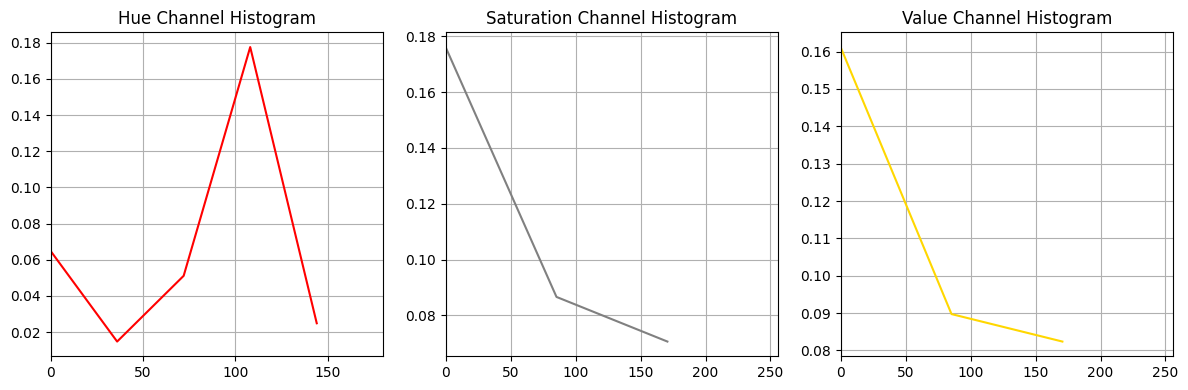

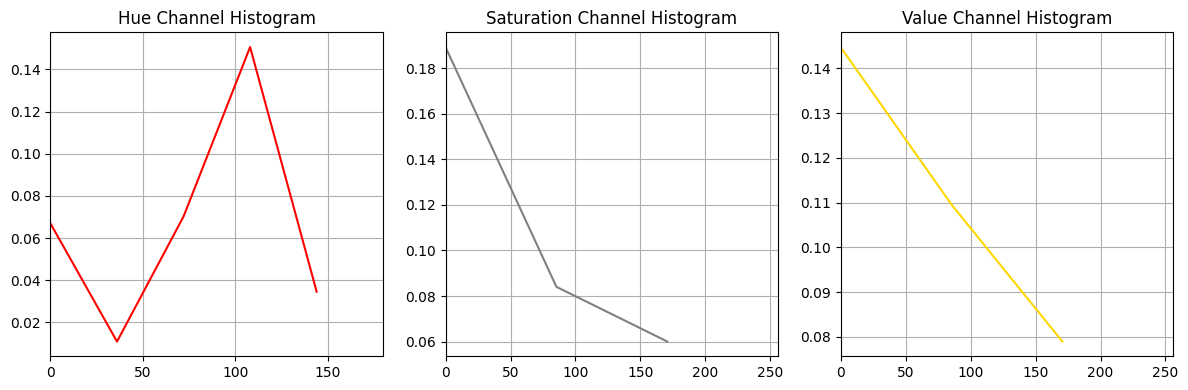

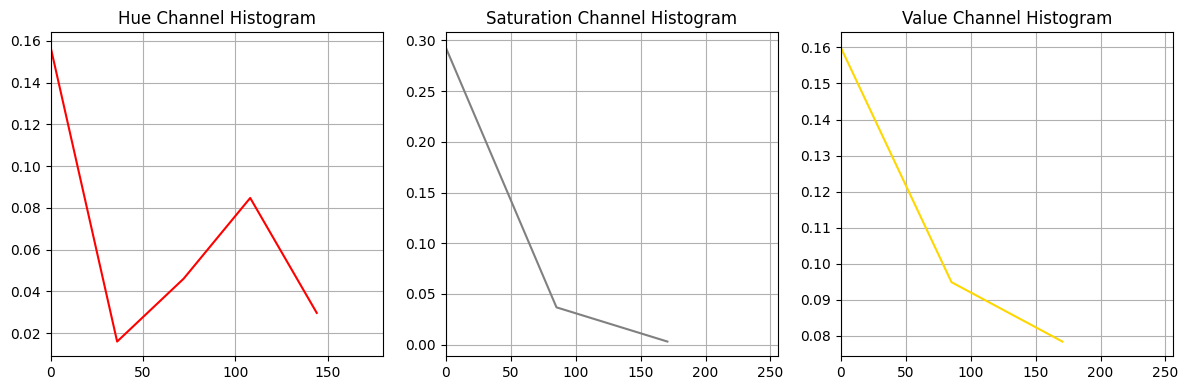

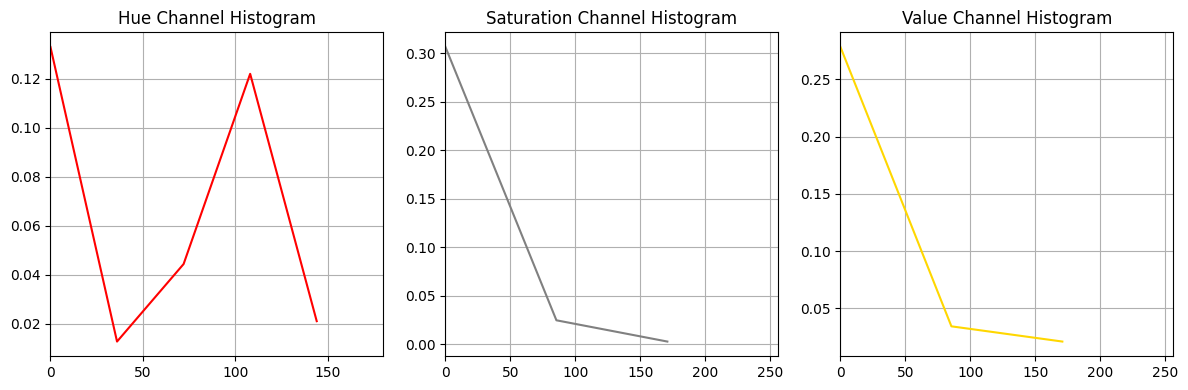

In [19]:
# plot histogram for each class
for class_id, histogram_HSV in train_classes_histograms_HSV.items():
    plot_channel_HSV_histograms_for_class(class_id, np.squeeze(histogram_HSV))

In [20]:
# pick desired class to check 
desired_class_histograms = train_images_histograms_HSV[desired_class]
print(len(desired_class_histograms))

240


In [21]:
# Combine HSV channels to single feature list for further processing. Note keep separate features for each image
desired_class_histograms_features = []
for image_histogram in desired_class_histograms:
    features = [] # combined H, S, V channels
    for channel_hist in image_histogram:
        features.extend(channel_hist)
    desired_class_histograms_features.append(features)
desired_class_histograms_features = np.squeeze(np.array(desired_class_histograms_features))
print(desired_class_histograms_features.shape)

(240, 11)


In [22]:
# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', n_estimators=1000, max_features=10, random_state=99)

# Fit the model on the data
isolation_forest.fit(desired_class_histograms_features)

IsolationForest(max_features=10, n_estimators=1000, random_state=99)

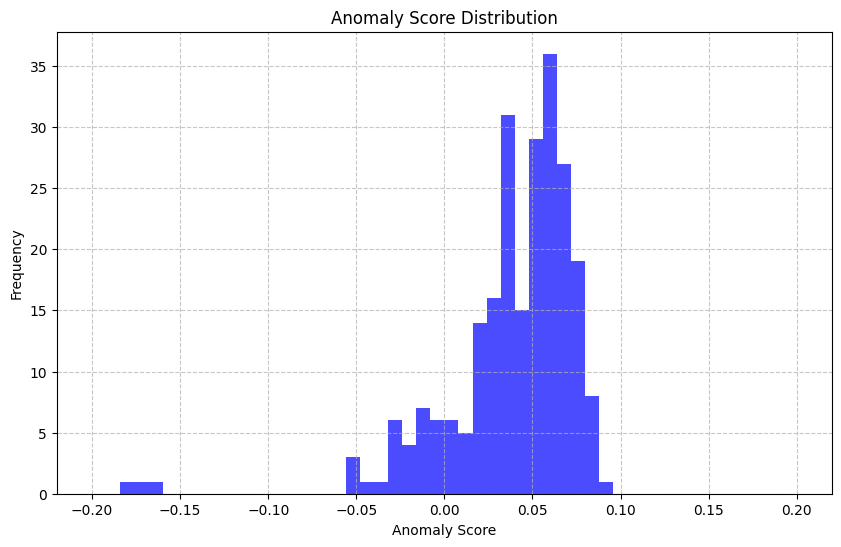

In [23]:
# Predict the anomaly score for each data point
anomaly_scores = isolation_forest.decision_function(desired_class_histograms_features)

# Visualize the anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, range=(-0.2, 0.2), color='blue', alpha=0.7)
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Anomaly Score Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
# get sorting indices from the smallest (biggest anomaly)
anomaly_score_indices = np.argsort(anomaly_scores)
print(anomaly_score_indices)

[ 83 217 104 134  79  61 179  60   0   1 195 193 178 204 192 177 194 208
 191  62 212 205 106 209 190 189  59  13 207 206  89 203 149   2  81  63
 119  80 105 196  58 200  29  11 197 148   3 176 146 211  56  82  88 147
  57 202  84 120 201   4  12 170 174  39 121 175 122 185 145 150 183   6
 210 118  78  41   8  64 198 236  51  54 199  93 172  77 187 173 188 213
   5 141  55 166  14 117  52 142 182   7  85  86 181 101 169  53 139  40
 184 143  28  42  50 180 171  87   9  97  38 123  30 103 138 102  27 221
  15 216 186 140 144 223  10  65 168  90  96  43  94 167 131  98  76  36
 235  31 220 218 227  91 224  92 164 233 165  20  66  67 116 136 132 222
 160 214  95  16 133  33 163  47 237 137 124 157 231  49  19 238  35  21
  48  18  22 135 162  17  46  26  34 230 100 152  69 158  37 215  32  68
  74  45 128  99  24 151 219 153 156 154  71  23 229 234 225 107  44  70
 155 226 127 130  73 161  75 115  25 126 232 125 159 239 114  72 228 129
 109 111 113 110 112 108]


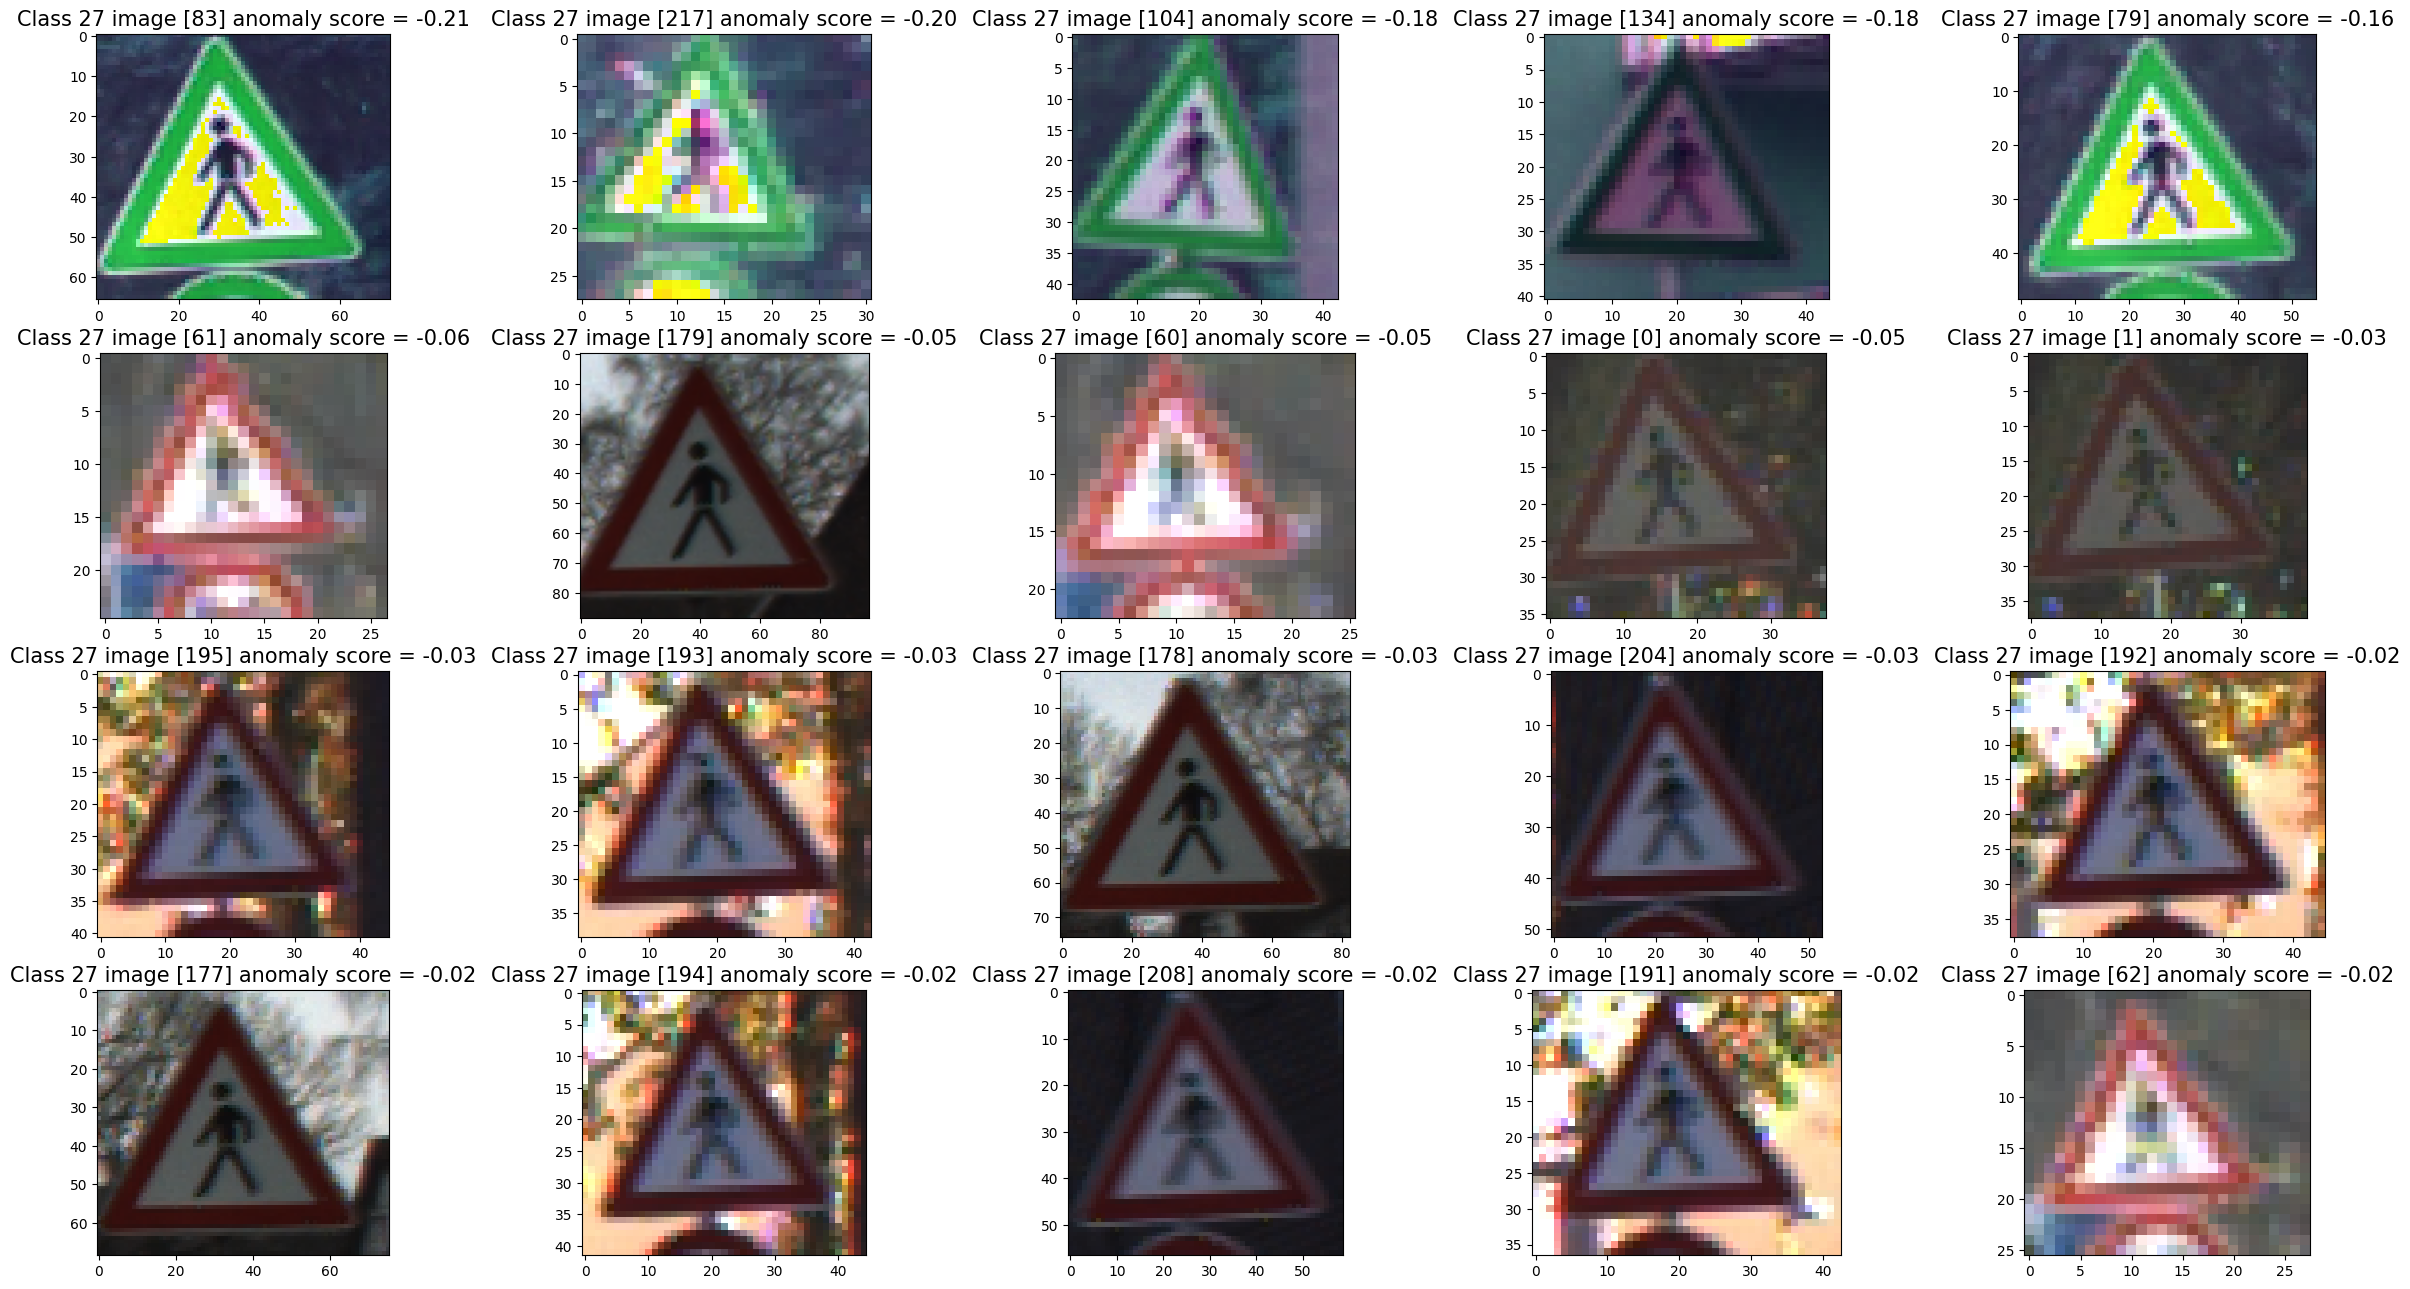

In [25]:
# lets print some images with most anomaly
images_show = []
titles_show = []
for i in range(0, 20):
    index = anomaly_score_indices[i]
    images_show.append(train_dict[desired_class][index])
    titles_show.append('Class ' + str(desired_class) + ' image [' + str(index) + '] anomaly score = ' + "{:.2f}".format(round(anomaly_scores[index], 2))) 
    
show_images(images_show, titles_show)

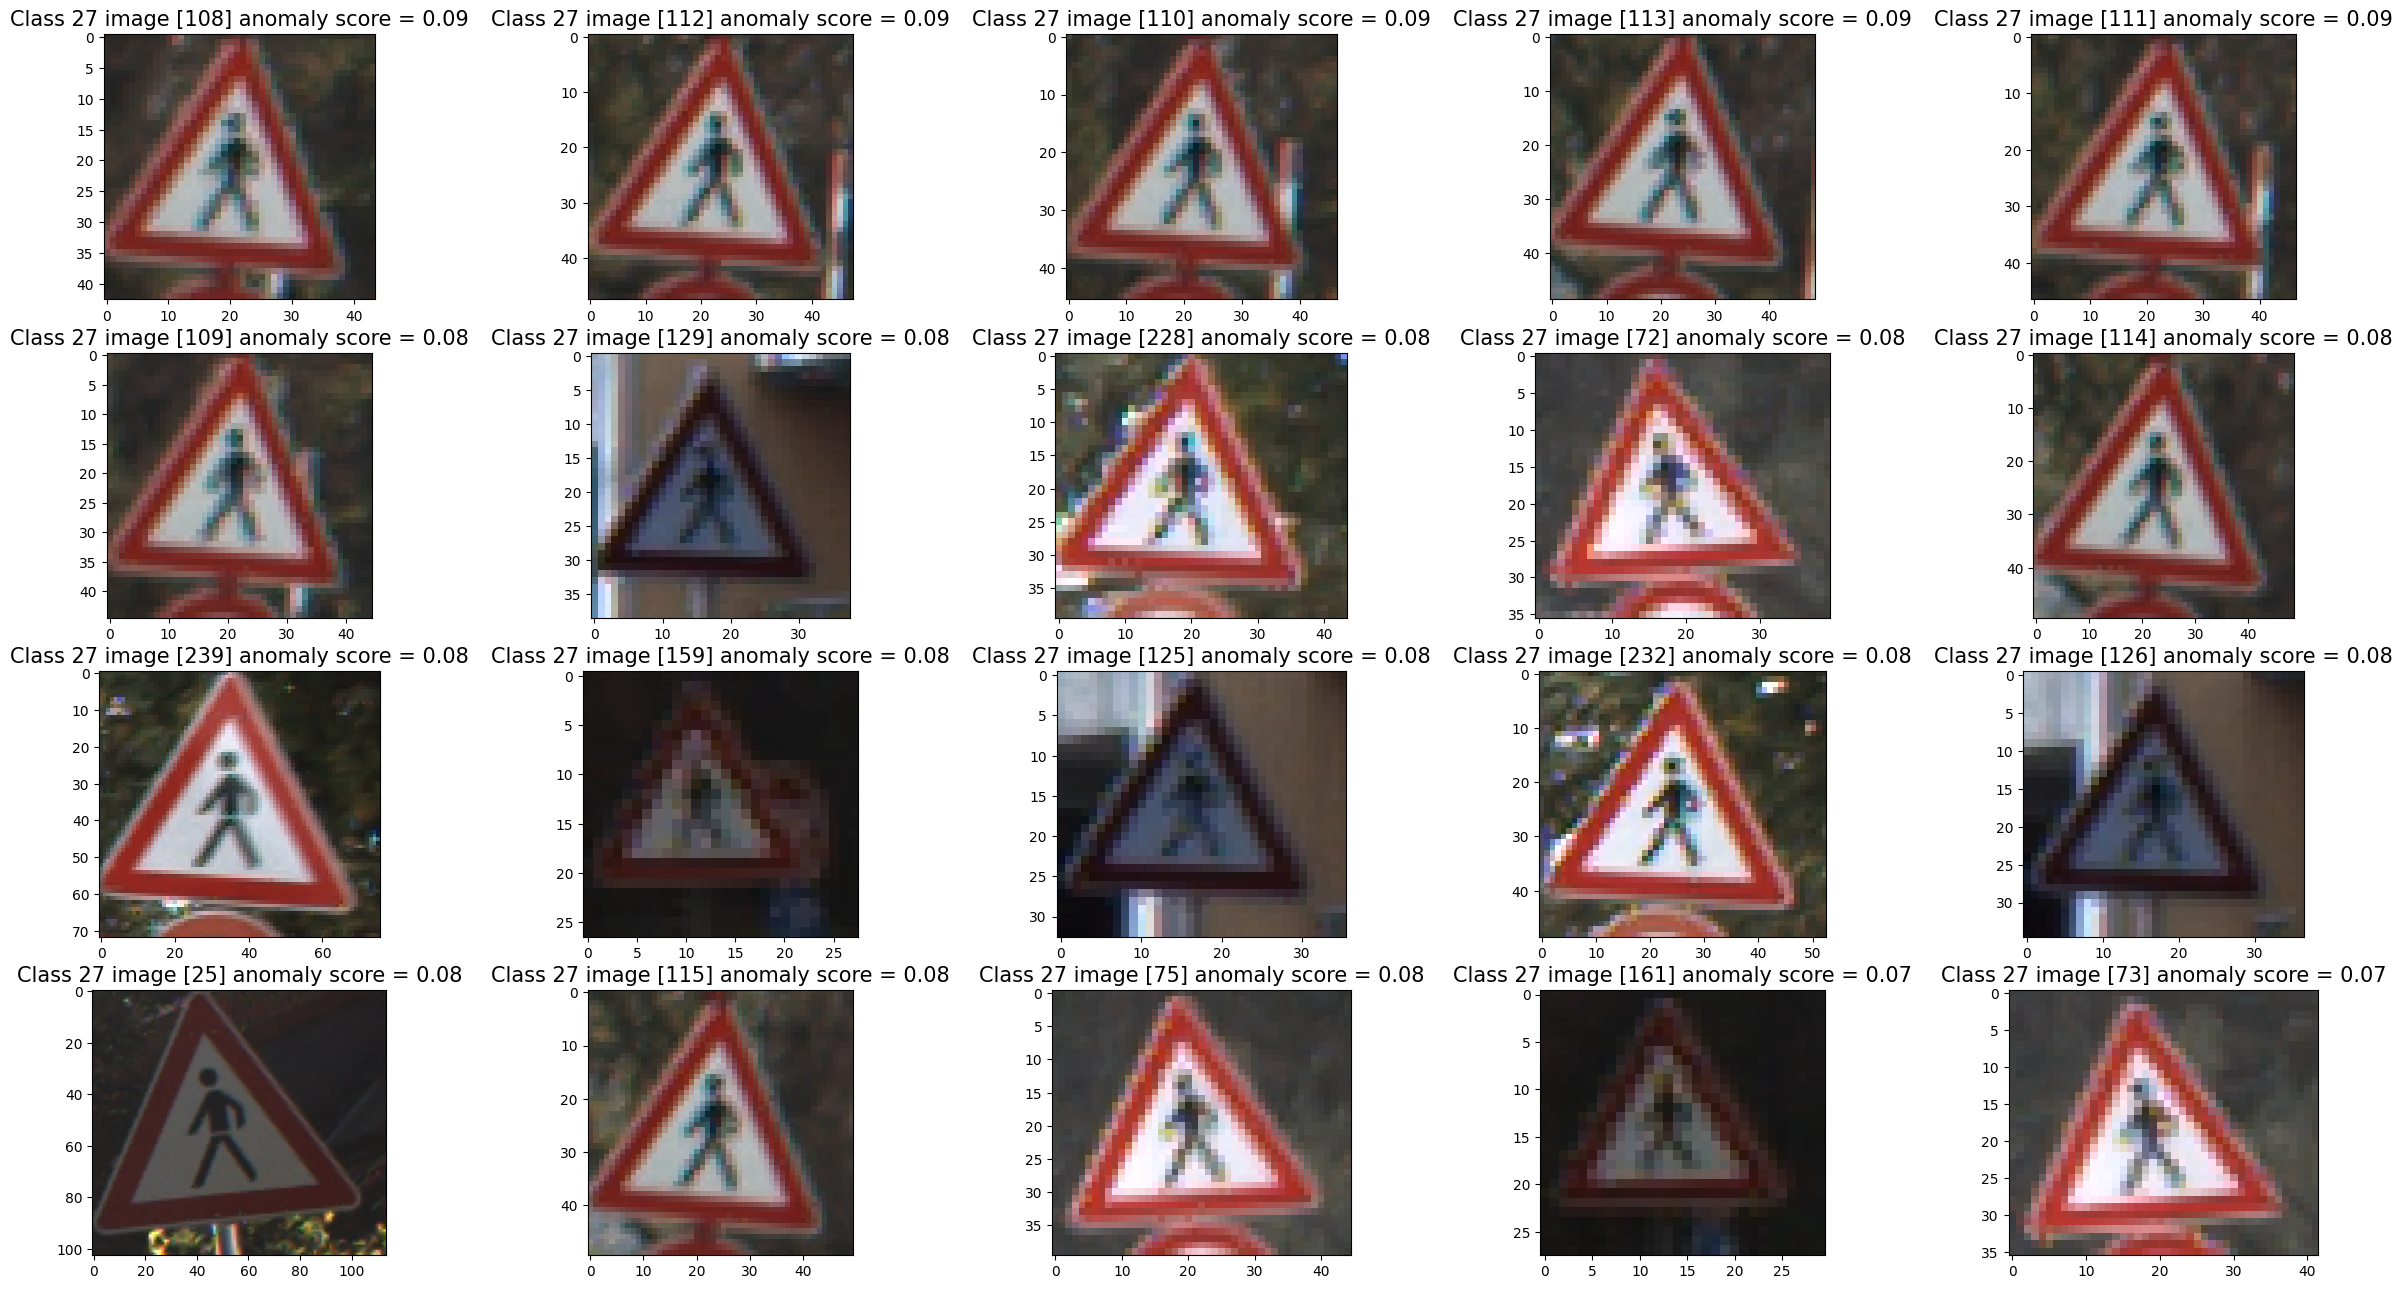

In [26]:
# draw best sample
# lets print some images with most anomaly
images_show = []
titles_show = []
for i in range(0, 20):
    index = anomaly_score_indices[len(anomaly_score_indices)-i-1]
    images_show.append(train_dict[desired_class][index])
    titles_show.append('Class ' + str(desired_class) + ' image [' + str(index) + '] anomaly score = ' + "{:.2f}".format(round(anomaly_scores[index], 2))) 
    
show_images(images_show, titles_show)